<a href="https://colab.research.google.com/github/iguchi-lab/jjj_CRAC/blob/master/CRAC_calc_200713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# „Çª„É≥„Éà„É©„É´„Ç®„Ç¢„Ç≥„É≥„Éá„Ç£„Ç∑„Éß„Éä„ÅÆ‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèË®àÁÆó

# Google Drive „ÅÆ„Éû„Ç¶„É≥„Éà

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# „Éï„Ç©„É´„ÉÄ„ÅÆË®≠ÂÆö

In [ ]:
import os
import sys
import numpy as np
import pandas as pd

In [ ]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/')
%cd /content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/
%pwd

/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG


'/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG'

In [ ]:
!pip install japanize-matplotlib                                                        
import japanize_matplotlib                                                              #Êó•Êú¨Ë™ûÂåñmatplotlib„Çíimport     „Ç∞„É©„ÉïÊèèÁîª
import matplotlib.pyplot as plt                                                         #matplotlib.pyplot„Çíimport      „Ç∞„É©„ÉïÊèèÁîª
import matplotlib.dates as mdates                                                       #matplotlib.pyplot„Çíimport      „Ç∞„É©„ÉïÊèèÁîª
import matplotlib as mpl                                                                #matplotlib„Çíimport             „Ç∞„É©„ÉïÊèèÁîª

from datetime import datetime, timedelta                                                #Êó•‰ªò

# section4-CRAC.py

In [ ]:
# „ÉÄ„ÇØ„ÉàÂºè„Çª„É≥„Éà„É©„É´Á©∫Ë™øÊ©ü
import pyhees.section4_2 as dc
import pyhees.section4_2_a as dc_a
import pyhees.section4_2_b as dc_spec

# „Ç®„Ç¢„Éº„Ç≥„É≥„Éá„Ç£„Ç∑„Éß„Éä„Éº
import pyhees.section4_3 as rac
import pyhees.section4_3_a as rac_spec

#Â∫ä‰∏ã
import pyhees.section3_1_e as uf

from functools import lru_cache

import datetime

import pyhees.section3_1 as ld

from pyhees.section3_2_8 import \
    get_r_env

from pyhees.section11_1 import \
    load_outdoor, \
    get_T_ex, \
    get_Theta_ex, \
    get_X_ex, \
    calc_h_ex, \
    load_climate, \
    get_J

from pyhees.section3_1 import \
    get_A_NR

from pyhees.section4_7_i import \
    get_A_A_R

from pyhees.section11_3 import \
    load_schedule, \
    get_schedule_ac

In [ ]:
# Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„Çã1ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÊöñÊàøÊôÇ„ÅÆÊ∂àË≤ªÈõªÂäõÈáèÔºàkWh/hÔºâ(1)
def calc_CRAC_E_E_H_d_t(Theta_hs_out_d_t, Theta_hs_in_d_t, V_hs_supply_d_t, V_hs_vent_d_t, C_df_H_d_t,
           V_hs_dsgn_H, P_fan_rtd_H, region, q_rtd_C, q_rtd_H, e_rtd_H):

    df_output = pd.DataFrame(index =pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'))

    # (3)
    q_hs_H_d_t = dc_a.get_q_hs_H_d_t(Theta_hs_out_d_t, Theta_hs_in_d_t, V_hs_supply_d_t, C_df_H_d_t, region)

    E_E_CRAC_H_d_t = rac.calc_E_E_H_d_t(region, q_rtd_C, q_rtd_H, e_rtd_H, False, q_hs_H_d_t * 3.6 / 1000)

    # (37)
    E_E_fan_H_d_t = dc_a.get_E_E_fan_H_d_t(P_fan_rtd_H, V_hs_vent_d_t, V_hs_supply_d_t, V_hs_dsgn_H, q_hs_H_d_t * 3.6 / 1000)

    df_output['q_hs_H_d_t'] = q_hs_H_d_t
    df_output['E_E_CRAC_H_d_t'] = E_E_CRAC_H_d_t
    df_output['E_E_fan_H_d_t'] = E_E_fan_H_d_t

    # (1)
    E_E_H_d_t = E_E_CRAC_H_d_t + E_E_fan_H_d_t

    print('„Äêcalc_CRAC_E_E_H_d_t„Äë')

    fig=plt.figure(facecolor = 'w', figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), q_hs_H_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('1ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂπ≥ÂùáÊöñÊàøËÉΩÂäõ (W)')                                                                           
    ax.set_ylim(0, 8000)
    plt.show() 

    fig=plt.figure(facecolor = 'w',figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_CRAC_H_d_t, linewidth = 0.5)
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_fan_H_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('Ê∂àË≤ªÈõªÂäõÈáè„ÄÄÔºàkWh/hÔºâ')                                                                           
    ax.set_ylim(0, 5)
    plt.show() 

    df_output.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output_CRAC_heating.csv')
    return E_E_H_d_t

In [ ]:
def get_q_hs_C_d_t_2(Theta_hs_out_d_t, Theta_hs_in_d_t, X_hs_out_d_t, X_hs_in_d_t,V_hs_supply_d_t, region):
    """(4a-1)(4b-1)(4c-1)(4a-2)(4b-2)(4c-2)(4a-3)(4b-3)(4c-3)

    :param Theta_hs_out_d_t:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„ÇãÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶Ôºà‚ÑÉÔºâ
    :param Theta_hs_in_d_t:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„ÇãÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶Ôºà‚ÑÉÔºâ
    :param X_hs_out_d_t:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„ÇãÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁµ∂ÂØæÊπøÂ∫¶Ôºàkg/kg(DA)Ôºâ
    :param X_hs_in_d_t:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„ÇãÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁµ∂ÂØæÊπøÂ∫¶Ôºàkg/kg(DA)Ôºâ
    :param V_hs_supply_d_t:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„ÇãÁÜ±Ê∫êÊ©ü„ÅÆÈ¢®ÈáèÔºàm3/hÔºâ
    :param region:Âú∞ÂüüÂå∫ÂàÜ
    :return:Êó•‰ªòd„ÅÆÊôÇÂàªt„Å´„Åä„Åë„Çã1ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂπ≥ÂùáÂÜ∑ÊàøËÉΩÂäõÔºà-Ôºâ
    """
    H, C, M = dc_a.get_season_array_d_t(region)
    c_p_air = dc_a.get_c_p_air()
    rho_air = dc_a.get_rho_air()
    L_wtr = dc_a.get_L_wtr()

    # ÊöñÊàøÊúü„Åä„Çà„Å≥‰∏≠ÈñìÊúü (4a-1)(4b-1)(4c-1)(4a-3)(4b-3)(4c-3)
    q_hs_C_d_t = np.zeros(24 * 365)
    q_hs_CS_d_t = np.zeros(24 * 365)
    q_hs_CL_d_t = np.zeros(24 * 365)

    # ÂÜ∑ÊàøÊúü (4a-2)(4b-2)(4c-2)
    q_hs_CS_d_t[C] = np.clip(c_p_air * rho_air * (Theta_hs_in_d_t[C] - Theta_hs_out_d_t[C]) * (V_hs_supply_d_t[C] / 3600), 0, None)

    Cf = np.logical_and(C, q_hs_CS_d_t > 0)

    q_hs_CL_d_t[Cf] = np.clip(L_wtr * rho_air * (X_hs_in_d_t[Cf] - X_hs_out_d_t[Cf]) * (V_hs_supply_d_t[Cf] / 3600) * 10 ** 3, 0, None)

    return  q_hs_CS_d_t, q_hs_CL_d_t

In [ ]:
def get_CRAC_E_E_C_d_t(Theta_hs_out_d_t, Theta_hs_in_d_t,  X_hs_out_d_t, X_hs_in_d_t, V_hs_supply_d_t, V_hs_vent_d_t,
                  q_rtd_C, e_rtd_C, V_hs_dsgn_C, P_fan_rtd_C, region):

    df_output = pd.DataFrame(index =pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'))

    # Â§ñÊ∞óÊù°‰ª∂
    outdoor = load_outdoor()

    

    Theta_ex_d_t = get_Theta_ex(region, outdoor)

    # (4)
    q_hs_CS_d_t, q_hs_CL_d_t = get_q_hs_C_d_t_2(Theta_hs_out_d_t, Theta_hs_in_d_t, X_hs_out_d_t, X_hs_in_d_t, V_hs_supply_d_t, region)

    E_E_CRAC_C_d_t = rac.calc_E_E_C_d_t(region, q_rtd_C, e_rtd_C, False, q_hs_CS_d_t * 3.6 / 1000, q_hs_CL_d_t * 3.6 / 1000)

    # (38)
    E_E_fan_C_d_t = dc_a.get_E_E_fan_C_d_t(P_fan_rtd_C, V_hs_vent_d_t, V_hs_supply_d_t, V_hs_dsgn_C, q_hs_CS_d_t * 3.6 / 1000 + q_hs_CL_d_t * 3.6 / 1000)

    df_output['q_hs_CS_d_t'] = q_hs_CS_d_t
    df_output['q_hs_CL_d_t'] = q_hs_CL_d_t
    df_output['E_E_CRAC_C_d_t'] = E_E_CRAC_C_d_t
    df_output['E_E_fan_C_d_t'] = E_E_fan_C_d_t

    # (2)
    E_E_C_d_t = E_E_CRAC_C_d_t + E_E_fan_C_d_t

    print('„Äêget_CRAC_E_E_C_d_t„Äë')

    fig=plt.figure(facecolor = 'w', figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), q_hs_CS_d_t, linewidth = 0.5)
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), q_hs_CL_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('1ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂπ≥ÂùáÂÜ∑ÊàøËÉΩÂäõ (W)')                                                                           
    ax.set_ylim(0, 8000)
    plt.show() 

    fig=plt.figure(facecolor = 'w',figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_CRAC_C_d_t, linewidth = 0.5)
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_fan_C_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('Ê∂àË≤ªÈõªÂäõÈáè„ÄÄÔºàkWh/hÔºâ')                                                                           
    ax.set_ylim(0, 5)
    plt.show() 

    df_output.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output_CRAC_cooling.csv')

    return E_E_C_d_t

In [ ]:
# Êú™Âá¶ÁêÜË≤†Ëç∑„Å®Ê©üÂô®„ÅÆË®àÁÆó„Å´ÂøÖË¶Å„Å™Â§âÊï∞„ÇíÂèñÂæó
def calc_CRAC_Q_UT_A(A_A, A_MR, A_OR, A_env, mu_H, mu_C, q_rtd_C, q_rtd_H, q_max_C, q_max_H, V_hs_dsgn_H, V_hs_dsgn_C, Q,
             VAV, general_ventilation, duct_insulation, region, L_H_d_t_i, L_CS_d_t_i, L_CL_d_t_i):

    df_output = pd.DataFrame(index =pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'))
    df_output2 = pd.DataFrame()

    # Â§ñÊ∞óÊù°‰ª∂
    outdoor = load_outdoor()
    Theta_ex_d_t = get_Theta_ex(region, outdoor)
    X_ex_d_t = get_X_ex(region, outdoor)
    climate = load_climate(region)
    J_d_t = get_J(climate)
    h_ex_d_t = calc_h_ex(X_ex_d_t, Theta_ex_d_t)

    df_output['Theta_ex_d_t'] = Theta_ex_d_t
    df_output['X_ex_d_t'] = X_ex_d_t
    df_output['J_d_t'] = J_d_t

    print('„Äêcalc_CRAC_Q_UT_A„Äë')
    
    fig=plt.figure(facecolor = 'w', figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), Theta_ex_d_t, linewidth = 0.5)
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), X_ex_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('Ê∏©Â∫¶Ôºà‚ÑÉÔºâ„ÄÅÁµ∂ÂØæÊπøÂ∫¶Ôºàg/kgÔºâ')                                                                           
    ax.set_ylim(-10, 40)
    plt.show() 

    fig=plt.figure(facecolor = 'w', figsize = (15, 2))
    ax = fig.add_subplot(1, 1, 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), J_d_t, linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('Ê∞¥Âπ≥Èù¢ÂÖ®Â§©Êó•Â∞ÑÈáèÔºàW/m2Ôºâ')                                                                           
    ax.set_ylim(0, 500)
    plt.show() 

    #‰∏ª„Åü„ÇãÂ±ÖÂÆ§„Éª„Åù„ÅÆ‰ªñÂ±ÖÂÆ§„ÉªÈùûÂ±ÖÂÆ§„ÅÆÈù¢Á©ç
    A_HCZ_i = np.array([ld.get_A_HCZ_i(i, A_A, A_MR, A_OR) for i in range(1, 6)])
    A_HCZ_R_i = [ld.get_A_HCZ_R_i(i) for i in range(1, 6)]
    A_NR = get_A_NR(A_A, A_MR, A_OR)

    df_output2['A_HCZ_i'] = A_HCZ_i
    df_output2['A_HCZ_R_i'] = A_HCZ_R_i
    df_output2['A_NR'] = A_NR

    # (67)  Ê∞¥„ÅÆËí∏Áô∫ÊΩúÁÜ±
    L_wtr = dc.get_L_wtr()
    df_output2['L_wtr'] = L_wtr

    # (66d)„ÄÄÈùûÂ±ÖÂÆ§„ÅÆÂú®ÂÆ§‰∫∫Êï∞
    n_p_NR_d_t = dc.calc_n_p_NR_d_t(A_NR)
    df_output['n_p_NR_d_t'] = n_p_NR_d_t

    # (66c)„ÄÄ„Åù„ÅÆ‰ªñÂ±ÖÂÆ§„ÅÆÂú®ÂÆ§‰∫∫Êï∞
    n_p_OR_d_t = dc.calc_n_p_OR_d_t(A_OR)
    df_output['n_p_OR_d_t'] = n_p_OR_d_t

    # (66b)„ÄÄ‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂú®ÂÆ§‰∫∫Êï∞
    n_p_MR_d_t = dc.calc_n_p_MR_d_t(A_MR)
    df_output['n_p_MR_d_t'] = n_p_MR_d_t

    # (66a)„ÄÄÂú®ÂÆ§‰∫∫Êï∞
    n_p_d_t = dc.get_n_p_d_t(n_p_MR_d_t, n_p_OR_d_t, n_p_NR_d_t)
    df_output['n_p_d_t'] = n_p_d_t

    # ‰∫∫‰ΩìÁô∫ÁÜ±
    q_p_H = dc.get_q_p_H()
    q_p_CS = dc.get_q_p_CS()
    q_p_CL = dc.get_q_p_CL()
    df_output2['q_p_H'] = q_p_H
    df_output2['q_p_CS'] = q_p_CS
    df_output2['q_p_CL'] = q_p_CL

    # (65d)„ÄÄÈùûÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫Êπø
    w_gen_NR_d_t = dc.calc_w_gen_NR_d_t(A_NR)
    df_output['w_gen_NR_d_t'] = w_gen_NR_d_t

    # (65c)„ÄÄ„Åù„ÅÆ‰ªñÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫Êπø
    w_gen_OR_d_t = dc.calc_w_gen_OR_d_t(A_OR)
    df_output['w_gen_OR_d_t'] = w_gen_OR_d_t

    # (65b)„ÄÄ‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫Êπø
    w_gen_MR_d_t = dc.calc_w_gen_MR_d_t(A_MR)
    df_output['w_gen_MR_d_t'] = w_gen_MR_d_t

    # (65a)„ÄÄÂÜÖÈÉ®Áô∫Êπø
    w_gen_d_t = dc.get_w_gen_d_t(w_gen_MR_d_t, w_gen_OR_d_t, w_gen_NR_d_t)
    df_output['w_gen_d_t'] = w_gen_d_t

    # (64d)„ÄÄÈùûÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫ÁÜ±
    q_gen_NR_d_t = dc.calc_q_gen_NR_d_t(A_NR)
    df_output['q_gen_NR_d_t'] = q_gen_NR_d_t

    # (64c)„ÄÄ„Åù„ÅÆ‰ªñÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫ÁÜ±
    q_gen_OR_d_t = dc.calc_q_gen_OR_d_t(A_OR)
    df_output['q_gen_OR_d_t'] = q_gen_OR_d_t

    # (64b)„ÄÄ‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂÜÖÈÉ®Áô∫ÁÜ±
    q_gen_MR_d_t = dc.calc_q_gen_MR_d_t(A_MR)
    df_output['q_gen_MR_d_t'] = q_gen_MR_d_t

    # (64a)„ÄÄÂÜÖÈÉ®Áô∫ÁÜ±
    q_gen_d_t = dc.get_q_gen_d_t(q_gen_MR_d_t, q_gen_OR_d_t, q_gen_NR_d_t)
    df_output['q_gen_d_t'] = q_gen_d_t

    # (63)„ÄÄÂ±ÄÊâÄÊéíÊ∞óÈáè
    V_vent_l_NR_d_t = dc.get_V_vent_l_NR_d_t()
    V_vent_l_OR_d_t = dc.get_V_vent_l_OR_d_t()
    V_vent_l_MR_d_t = dc.get_V_vent_l_MR_d_t()
    V_vent_l_d_t = dc.get_V_vent_l_d_t(V_vent_l_MR_d_t, V_vent_l_OR_d_t, V_vent_l_NR_d_t)

    df_output['V_vent_l_NR_d_t'] = V_vent_l_NR_d_t
    df_output['V_vent_l_OR_d_t'] = V_vent_l_OR_d_t
    df_output['V_vent_l_MR_d_t'] = V_vent_l_MR_d_t
    df_output['V_vent_l_d_t'] = V_vent_l_d_t

    # (62)„ÄÄÂÖ®Ëà¨ÊèõÊ∞óÈáè
    V_vent_g_i = dc.get_V_vent_g_i(A_HCZ_i, A_HCZ_R_i)
    df_output2['V_vent_g_i'] = V_vent_g_i

    # (61)„ÄÄÈñì‰ªïÂàá„ÅÆÁÜ±Ë≤´ÊµÅÁéá
    U_prt = dc.get_U_prt()
    df_output2['U_prt'] = U_prt

    # (60)„ÄÄÈùûÂ±ÖÂÆ§„ÅÆÈñì‰ªïÂàá„ÅÆÈù¢Á©ç
    r_env = get_r_env(A_env, A_A)
    A_prt_i = dc.get_A_prt_i(A_HCZ_i, r_env, A_MR, A_NR, A_OR)
    df_output2['r_env'] = r_env
    df_output2['A_prt_i'] = A_prt_i

    # (59)„ÄÄÁ≠â‰æ°Â§ñÊ∞óÊ∏©Â∫¶
    Theta_SAT_d_t = dc.get_Theta_SAT_d_t(Theta_ex_d_t, J_d_t)
    df_output['Theta_SAT_d_t'] = Theta_SAT_d_t

    # (58)„ÄÄÊñ≠ÁÜ±Âå∫ÁîªÂ§ñ„ÇíÈÄö„Çã„ÉÄ„ÇØ„Éà„ÅÆÈï∑„Åï
    l_duct_ex_i = dc.get_l_duct_ex_i(A_A)
    df_output2['l_duct_ex_i'] = l_duct_ex_i

    # (57)„ÄÄÊñ≠ÁÜ±Âå∫ÁîªÂÜÖ„ÇíÈÄö„Çã„ÉÄ„ÇØ„ÉàÈï∑„Åï
    l_duct_in_i = dc.get_l_duct_in_i(A_A)
    df_output2['l_duct_in_i'] = l_duct_in_i

    # (56)„ÄÄ„ÉÄ„ÇØ„ÉàÈï∑„Åï
    l_duct_i = dc.get_l_duct__i(l_duct_in_i, l_duct_ex_i)
    df_output2['l_duct_i'] = l_duct_i

    # (51)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÂ±ÖÂÆ§„ÅÆÁµ∂ÂØæÊπøÂ∫¶
    X_star_HBR_d_t = dc.get_X_star_HBR_d_t(X_ex_d_t, region)
    df_output['X_star_HBR_d_t'] = X_star_HBR_d_t

    # (50)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÂ±ÖÂÆ§„ÅÆÂÆ§Ê∏©
    Theta_star_HBR_d_t = dc.get_Theta_star_HBR_d_t(Theta_ex_d_t, region)
    df_output['Theta_star_HBR_d_t'] = Theta_star_HBR_d_t   

    # (55)„ÄÄÂ∞èÂ±ãË£è„ÅÆÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_attic_d_t = dc.get_Theta_attic_d_t(Theta_SAT_d_t, Theta_star_HBR_d_t)
    df_output['Theta_attic_d_t'] = Theta_attic_d_t     

    # (54)„ÄÄ„ÉÄ„ÇØ„Éà„ÅÆÂë®Âõ≤„ÅÆÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_sur_d_t_i = dc.get_Theta_sur_d_t_i(Theta_star_HBR_d_t, Theta_attic_d_t, l_duct_in_i, l_duct_ex_i, duct_insulation)
    df_output['Theta_sur_d_t_i_1'] = Theta_sur_d_t_i[0]
    df_output['Theta_sur_d_t_i_2'] = Theta_sur_d_t_i[1]
    df_output['Theta_sur_d_t_i_3'] = Theta_sur_d_t_i[2]
    df_output['Theta_sur_d_t_i_4'] = Theta_sur_d_t_i[3]
    df_output['Theta_sur_d_t_i_5'] = Theta_sur_d_t_i[4]

    # (40)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÈ¢®Èáè„ÇíË®àÁÆó„Åô„Çã„Åü„ÇÅ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âäõ
    Q_hat_hs_d_t = dc.calc_Q_hat_hs_d_t(Q, A_A, V_vent_l_d_t, V_vent_g_i, mu_H, mu_C, J_d_t, q_gen_d_t, n_p_d_t, q_p_H,
                                     q_p_CS, q_p_CL, X_ex_d_t, w_gen_d_t, Theta_ex_d_t, L_wtr, region)

    df_output['Q_hat_hs_d_t'] = Q_hat_hs_d_t

    # (39)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÊúÄ‰ΩéÈ¢®Èáè
    V_hs_min = dc.get_V_hs_min(V_vent_g_i)
    df_output2['V_hs_min'] = V_hs_min    

    ####################################################################################################################
    # (38)„ÄÄÂÜ∑ÊàøÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂÆöÊ†ºÂá∫Âäõ
    Q_hs_rtd_C = dc.get_Q_hs_rtd_C(q_rtd_C)             #„É´„Éº„É†„Ç®„Ç¢„Ç≥„É≥„Éá„Ç£„Ç∑„Éß„Éä„ÅÆÂÆöÊ†ºËÉΩÂäõ q_rtd_C „ÇíÂÖ•Âäõ„Åô„Çã„Çà„ÅÜÊõ∏„ÅçÊèõ„Åà
    df_output2['Q_hs_rtd_C'] = Q_hs_rtd_C  

    # (37)„ÄÄÊöñÊàøÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂÆöÊ†ºÂá∫Âäõ
    Q_hs_rtd_H = dc.get_Q_hs_rtd_H(q_rtd_H)             #„É´„Éº„É†„Ç®„Ç¢„Ç≥„É≥„Éá„Ç£„Ç∑„Éß„Éä„ÅÆÂÆöÊ†ºËÉΩÂäõ q_rtd_H „ÇíÂÖ•Âäõ„Åô„Çã„Çà„ÅÜÊõ∏„ÅçÊèõ„Åà
    df_output2['Q_hs_rtd_H'] = Q_hs_rtd_H 
    ####################################################################################################################

    # (36)„ÄÄVAV Ë™øÊï¥Ââç„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÈ¢®Èáè
    if CAV:
        H, C, M = dc_a.get_season_array_d_t(region)
        V_dash_hs_supply_d_t = np.zeros(24 * 365)
        V_dash_hs_supply_d_t[H] = V_hs_dsgn_H
        V_dash_hs_supply_d_t[C] = V_hs_dsgn_C
        V_dash_hs_supply_d_t[M] = (V_hs_dsgn_H + V_hs_dsgn_C) / 2
    else:
        V_dash_hs_supply_d_t = dc.get_V_dash_hs_supply_d_t(V_hs_min, V_hs_dsgn_H, V_hs_dsgn_C, Q_hs_rtd_H, Q_hs_rtd_C, Q_hat_hs_d_t, region)
    
    df_output['V_dash_hs_supply_d_t'] = V_dash_hs_supply_d_t

    # (45)„ÄÄÈ¢®Èáè„Éê„É©„É≥„Çπ
    r_supply_des_i = dc.get_r_supply_des_i(A_HCZ_i)
    df_output2['r_supply_des_i'] = r_supply_des_i

    # (44)„ÄÄVAV Ë™øÊï¥Ââç„ÅÆÂêπ„ÅçÂá∫„ÅóÈ¢®Èáè
    V_dash_supply_d_t_i = dc.get_V_dash_supply_d_t_i(r_supply_des_i, V_dash_hs_supply_d_t, V_vent_g_i)
    df_output['V_dash_supply_d_t_1'] = V_dash_supply_d_t_i[0]
    df_output['V_dash_supply_d_t_2'] = V_dash_supply_d_t_i[1]
    df_output['V_dash_supply_d_t_3'] = V_dash_supply_d_t_i[2]
    df_output['V_dash_supply_d_t_4'] = V_dash_supply_d_t_i[3]
    df_output['V_dash_supply_d_t_5'] = V_dash_supply_d_t_i[4]

    # (53)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÈùûÂ±ÖÂÆ§„ÅÆÁµ∂ÂØæÊπøÂ∫¶
    X_star_NR_d_t = dc.get_X_star_NR_d_t(X_star_HBR_d_t, L_CL_d_t_i, L_wtr, V_vent_l_NR_d_t, V_dash_supply_d_t_i, region)
    df_output['X_star_NR_d_t'] = X_star_NR_d_t

    # (52)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÈùûÂ±ÖÂÆ§„ÅÆÂÆ§Ê∏©
    Theta_star_NR_d_t = dc.get_Theta_star_NR_d_t(Theta_star_HBR_d_t, Q, A_NR, V_vent_l_NR_d_t, V_dash_supply_d_t_i, U_prt,
                                              A_prt_i, L_H_d_t_i, L_CS_d_t_i, region)
    df_output['Theta_star_NR_d_t'] = Theta_star_NR_d_t

    # (49)„ÄÄÂÆüÈöõ„ÅÆÈùûÂ±ÖÂÆ§„ÅÆÁµ∂ÂØæÊπøÂ∫¶
    X_NR_d_t = dc.get_X_NR_d_t(X_star_NR_d_t)
    df_output['X_NR_d_t'] = X_NR_d_t    

    # (47)„ÄÄÂÆüÈöõ„ÅÆÂ±ÖÂÆ§„ÅÆÁµ∂ÂØæÊπøÂ∫¶
    X_HBR_d_t_i = dc.get_X_HBR_d_t_i(X_star_HBR_d_t)
    df_output['X_HBR_d_t_1'] = X_HBR_d_t_i[0]  
    df_output['X_HBR_d_t_2'] = X_HBR_d_t_i[1]  
    df_output['X_HBR_d_t_3'] = X_HBR_d_t_i[2]  
    df_output['X_HBR_d_t_4'] = X_HBR_d_t_i[3]     
    df_output['X_HBR_d_t_5'] = X_HBR_d_t_i[4]  

    # (11)„ÄÄÁÜ±ÊêçÂ§±„ÇíÂê´„ÇÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÈùûÂ±ÖÂÆ§„Å∏„ÅÆÁÜ±ÁßªÂãï
    Q_star_trs_prt_d_t_i = dc.get_Q_star_trs_prt_d_t_i(U_prt, A_prt_i, Theta_star_HBR_d_t, Theta_star_NR_d_t)
    df_output['Q_star_trs_prt_d_t_i_1'] = Q_star_trs_prt_d_t_i[0]  
    df_output['Q_star_trs_prt_d_t_i_2'] = Q_star_trs_prt_d_t_i[1]  
    df_output['Q_star_trs_prt_d_t_i_3'] = Q_star_trs_prt_d_t_i[2]  
    df_output['Q_star_trs_prt_d_t_i_4'] = Q_star_trs_prt_d_t_i[3]     
    df_output['Q_star_trs_prt_d_t_i_5'] = Q_star_trs_prt_d_t_i[4]  

    # (10)„ÄÄÁÜ±ÂèñÂæó„ÇíÂê´„ÇÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑
    L_star_CL_d_t_i = dc.get_L_star_CL_d_t_i(L_CS_d_t_i, L_CL_d_t_i, region)
    df_output['L_star_CL_d_t_i_1'] = L_star_CL_d_t_i[0]  
    df_output['L_star_CL_d_t_i_2'] = L_star_CL_d_t_i[1]  
    df_output['L_star_CL_d_t_i_3'] = L_star_CL_d_t_i[2]  
    df_output['L_star_CL_d_t_i_4'] = L_star_CL_d_t_i[3]  
    df_output['L_star_CL_d_t_i_5'] = L_star_CL_d_t_i[4]  

    # (9)„ÄÄÁÜ±ÂèñÂæó„ÇíÂê´„ÇÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑
    L_star_CS_d_t_i = dc.get_L_star_CS_d_t_i(L_CS_d_t_i, Q_star_trs_prt_d_t_i, region)
    df_output['L_star_CS_d_t_i_1'] = L_star_CS_d_t_i[0]  
    df_output['L_star_CS_d_t_i_2'] = L_star_CS_d_t_i[1]  
    df_output['L_star_CS_d_t_i_3'] = L_star_CS_d_t_i[2]  
    df_output['L_star_CS_d_t_i_4'] = L_star_CS_d_t_i[3]  
    df_output['L_star_CS_d_t_i_5'] = L_star_CS_d_t_i[4]  

    # (8)„ÄÄÁÜ±ÊêçÂ§±„ÇíÂê´„ÇÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÊöñÊàøË≤†Ëç∑
    L_star_H_d_t_i = dc.get_L_star_H_d_t_i(L_H_d_t_i, Q_star_trs_prt_d_t_i, region)
    df_output['L_star_H_d_t_i_1'] = L_star_H_d_t_i[0]  
    df_output['L_star_H_d_t_i_2'] = L_star_H_d_t_i[1]  
    df_output['L_star_H_d_t_i_3'] = L_star_H_d_t_i[2]  
    df_output['L_star_H_d_t_i_4'] = L_star_H_d_t_i[3]  
    df_output['L_star_H_d_t_i_5'] = L_star_H_d_t_i[4]  

    ####################################################################################################################
    # (24)„ÄÄ„Éá„Éï„É≠„Çπ„Éà„Å´Èñ¢„Åô„ÇãÊöñÊàøÂá∫ÂäõË£úÊ≠£‰øÇÊï∞
    #C_df_H_d_t = dc.get_C_df_H_d_t(Theta_ex_d_t, h_ex_d_t)
    C_df_H_d_t = dc.get_C_df_H_d_t(30, h_ex_d_t)                                                                        #ÂøÖ„Åö1„Å´„Å™„Çã„Çà„ÅÜË®≠ÂÆöÔºàÊö´ÂÆöÔºâ
    df_output['C_df_H_d_t'] = C_df_H_d_t

    # ÊúÄÂ§ßÊöñÊàøËÉΩÂäõÊØî
    q_r_max_H = rac.get_q_r_max_H(q_max_H, q_rtd_H)
    df_output2['q_r_max_H'] = q_r_max_H

    # ÊúÄÂ§ßÊöñÊàøÂá∫ÂäõÊØî
    Q_r_max_H_d_t = rac.calc_Q_r_max_H_d_t(q_rtd_C, q_r_max_H, Theta_ex_d_t)
    df_output['Q_r_max_H_d_t'] = Q_r_max_H_d_t

    # ÊúÄÂ§ßÊöñÊàøÂá∫Âäõ
    Q_max_H_d_t = rac.calc_Q_max_H_d_t(Q_r_max_H_d_t, q_rtd_H, Theta_ex_d_t, h_ex_d_t)
    Q_hs_max_H_d_t = Q_max_H_d_t
    df_output['Q_hs_max_H_d_t'] = Q_hs_max_H_d_t

    # ÊúÄÂ§ßÂÜ∑ÊàøËÉΩÂäõÊØî
    q_r_max_C = rac.get_q_r_max_C(q_max_C, q_rtd_C)
    df_output2['q_r_max_C'] = q_r_max_C

    # ÊúÄÂ§ßÂÜ∑ÊàøÂá∫ÂäõÊØî
    Q_r_max_C_d_t = rac.calc_Q_r_max_C_d_t(q_r_max_C, q_rtd_C, Theta_ex_d_t)
    df_output['Q_r_max_C_d_t'] = Q_r_max_C_d_t

    # ÊúÄÂ§ßÂÜ∑ÊàøÂá∫Âäõ
    Q_max_C_d_t = rac.calc_Q_max_C_d_t(Q_r_max_C_d_t, q_rtd_C)

    # ÂÜ∑ÊàøË≤†Ëç∑ÊúÄÂ∞èÈ°ïÁÜ±ÊØî
    SHF_L_min_c = rac.get_SHF_L_min_c()
    df_output2['SHF_L_min_c'] = SHF_L_min_c

    # ÊúÄÂ§ßÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑
    L_max_CL_d_t = rac.get_L_max_CL_d_t(np.sum(L_CS_d_t_i, axis=0), SHF_L_min_c)
    df_output['L_max_CL_d_t'] = L_max_CL_d_t

    # Ë£úÊ≠£ÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑
    L_dash_CL_d_t = rac.get_L_dash_CL_d_t(L_max_CL_d_t, np.sum(L_CL_d_t_i, axis=0))
    L_dash_C_d_t = rac.get_L_dash_C_d_t(np.sum(L_CS_d_t_i, axis=0), L_dash_CL_d_t)
    df_output['L_dash_CL_d_t'] = L_dash_CL_d_t
    df_output['L_dash_C_d_t'] = L_dash_C_d_t

    # ÂÜ∑ÊàøË≤†Ëç∑Ë£úÊ≠£È°ïÁÜ±ÊØî
    SHF_dash_d_t = rac.get_SHF_dash_d_t(np.sum(L_CS_d_t_i, axis=0), L_dash_C_d_t)
    df_output['SHF_dash_d_t'] = SHF_dash_d_t

    # ÊúÄÂ§ßÂÜ∑ÊàøÈ°ïÁÜ±Âá∫Âäõ, ÊúÄÂ§ßÂÜ∑ÊàøÊΩúÁÜ±Âá∫Âäõ
    Q_max_CS_d_t = rac.get_Q_max_CS_d_t(Q_max_C_d_t, SHF_dash_d_t)
    Q_max_CL_d_t = rac.get_Q_max_CL_d_t(Q_max_C_d_t, SHF_dash_d_t, L_dash_CL_d_t)
    Q_hs_max_C_d_t = Q_max_C_d_t
    Q_hs_max_CL_d_t = Q_max_CL_d_t
    Q_hs_max_CS_d_t = Q_max_CS_d_t
    df_output['Q_hs_max_C_d_t'] = Q_hs_max_C_d_t
    df_output['Q_hs_max_CL_d_t'] = Q_hs_max_CL_d_t
    df_output['Q_hs_max_CS_d_t'] = Q_hs_max_CS_d_t

    ####################################################################################################################

    # (20)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁµ∂ÂØæÊπøÂ∫¶
    X_star_hs_in_d_t = dc.get_X_star_hs_in_d_t(X_star_NR_d_t)
    df_output['X_star_hs_in_d_t'] = X_star_hs_in_d_t

    # (19)„ÄÄË≤†Ëç∑„Éê„É©„É≥„ÇπÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_star_hs_in_d_t = dc.get_Theta_star_hs_in_d_t(Theta_star_NR_d_t)
    df_output['Theta_star_hs_in_d_t'] = Theta_star_hs_in_d_t

    # (18)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶„ÅÆÊúÄ‰ΩéÂÄ§
    X_hs_out_min_C_d_t = dc.get_X_hs_out_min_C_d_t(X_star_hs_in_d_t, Q_hs_max_CL_d_t, V_dash_supply_d_t_i)
    df_output['X_hs_out_min_C_d_t'] = X_hs_out_min_C_d_t

    # (22)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãË¶ÅÊ±ÇÁµ∂ÂØæÊπøÂ∫¶
    X_req_d_t_i = dc.get_X_req_d_t_i(X_star_HBR_d_t, L_star_CL_d_t_i, V_dash_supply_d_t_i, region)
    df_output['X_req_d_t_1'] = X_req_d_t_i[0]
    df_output['X_req_d_t_2'] = X_req_d_t_i[1]
    df_output['X_req_d_t_3'] = X_req_d_t_i[2]
    df_output['X_req_d_t_4'] = X_req_d_t_i[3]
    df_output['X_req_d_t_5'] = X_req_d_t_i[4]

    # (21)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãË¶ÅÊ±ÇÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_req_d_t_i = dc.get_Theta_req_d_t_i(Theta_sur_d_t_i, Theta_star_HBR_d_t, V_dash_supply_d_t_i,
                        L_star_H_d_t_i, L_star_CS_d_t_i, l_duct_i, region)
    
    if YUCACO:
        Theta_uf_d_t, Theta_g_surf_d_t = uf.calc_Theta(region, A_A, A_MR, A_OR, Q, r_A_ufvnt, underfloor_insulation, Theta_req_d_t_i[0], Theta_ex_d_t,
                                                V_dash_supply_d_t_i[0], _, L_H_d_t_i, L_CS_d_t_i)
        Theta_req_d_t_i[0] += (Theta_req_d_t_i[0] - Theta_uf_d_t)
        Theta_uf_d_t, Theta_g_surf_d_t = uf.calc_Theta(region, A_A, A_MR, A_OR, Q, r_A_ufvnt, underfloor_insulation, Theta_req_d_t_i[1], Theta_ex_d_t,
                                                V_dash_supply_d_t_i[1], _, L_H_d_t_i, L_CS_d_t_i)
        Theta_req_d_t_i[1] += (Theta_req_d_t_i[1] - Theta_uf_d_t)

    df_output['Theta_req_d_t_1'] = Theta_req_d_t_i[0]
    df_output['Theta_req_d_t_2'] = Theta_req_d_t_i[1]
    df_output['Theta_req_d_t_3'] = Theta_req_d_t_i[2]
    df_output['Theta_req_d_t_4'] = Theta_req_d_t_i[3]
    df_output['Theta_req_d_t_5'] = Theta_req_d_t_i[4]

    # (15)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁµ∂ÂØæÊπøÂ∫¶
    X_hs_out_d_t = dc.get_X_hs_out_d_t(X_NR_d_t, X_req_d_t_i, V_dash_supply_d_t_i, X_hs_out_min_C_d_t, L_star_CL_d_t_i, region)
    df_output['X_hs_out_d_t'] = X_hs_out_d_t

    # Âºè(14)(46)(48)„ÅÆÊù°‰ª∂„Å´Âêà„Çè„Åõ„Å¶Theta_NR_d_t„ÇíÂàùÊúüÂåñ
    Theta_NR_d_t = np.zeros(24 * 365)

    # (17)„ÄÄÂÜ∑ÊàøÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶„ÅÆÊúÄ‰ΩéÂÄ§
    Theta_hs_out_min_C_d_t = dc.get_Theta_hs_out_min_C_d_t(Theta_star_hs_in_d_t, Q_hs_max_CS_d_t, V_dash_supply_d_t_i)
    df_output['Theta_hs_out_min_C_d_t'] = Theta_hs_out_min_C_d_t

    # (16)„ÄÄÊöñÊàøÊôÇ„ÅÆÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶„ÅÆÊúÄÈ´òÂÄ§
    Theta_hs_out_max_H_d_t = dc.get_Theta_hs_out_max_H_d_t(Theta_star_hs_in_d_t, Q_hs_max_H_d_t, V_dash_supply_d_t_i)
    df_output['Theta_hs_out_max_H_d_t'] = Theta_hs_out_max_H_d_t

    # L_star_H_d_t_iÔºåL_star_CS_d_t_i„ÅÆÊöñÂÜ∑ÊàøÂå∫Áîª1ÔΩû5„ÇíÂêàÁÆó„Åó0‰ª•‰∏ä„Å†„Å£„ÅüÂ†¥Âêà„ÅÆÈ†ÜÂ∫è„ÅßË®àÁÆó
    # (14)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_hs_out_d_t = dc.get_Theta_hs_out_d_t(VAV, Theta_req_d_t_i, V_dash_supply_d_t_i,
                                            L_star_H_d_t_i, L_star_CS_d_t_i, region, Theta_NR_d_t,
                                            Theta_hs_out_max_H_d_t, Theta_hs_out_min_C_d_t)
    df_output['Theta_hs_out_d_t'] = Theta_hs_out_d_t

    # (43)„ÄÄÊöñÂÜ∑ÊàøÂå∫Áîªùëñ„ÅÆÂêπ„ÅçÂá∫„ÅóÈ¢®Èáè
    V_supply_d_t_i = dc.get_V_supply_d_t_i(L_star_H_d_t_i, L_star_CS_d_t_i, Theta_sur_d_t_i, l_duct_i, Theta_star_HBR_d_t,
                                                    V_vent_g_i, V_dash_supply_d_t_i, VAV, region, Theta_hs_out_d_t)
    df_output['V_supply_d_t_1'] = V_supply_d_t_i[0]
    df_output['V_supply_d_t_2'] = V_supply_d_t_i[1]
    df_output['V_supply_d_t_3'] = V_supply_d_t_i[2]
    df_output['V_supply_d_t_4'] = V_supply_d_t_i[3]
    df_output['V_supply_d_t_5'] = V_supply_d_t_i[4]

    # (41)„ÄÄÊöñÂÜ∑ÊàøÂå∫Áîªùëñ„ÅÆÂêπ„ÅçÂá∫„ÅóÊ∏©Â∫¶
    Theta_supply_d_t_i = dc.get_Thata_supply_d_t_i(Theta_sur_d_t_i, Theta_hs_out_d_t, Theta_star_HBR_d_t, l_duct_i,
                                                   V_supply_d_t_i, L_star_H_d_t_i, L_star_CS_d_t_i, region)

    if YUCACO:
        Theta_uf_d_t, Theta_g_surf_d_t = uf.calc_Theta(region, A_A, A_MR, A_OR, Q, r_A_ufvnt, underfloor_insulation, Theta_supply_d_t_i[0], Theta_ex_d_t,
                                                V_dash_supply_d_t_i[0], _, L_H_d_t_i, L_CS_d_t_i)
        Theta_supply_d_t_i[0] -= (Theta_supply_d_t_i[0] - Theta_uf_d_t)
        Theta_uf_d_t, Theta_g_surf_d_t = uf.calc_Theta(region, A_A, A_MR, A_OR, Q, r_A_ufvnt, underfloor_insulation, Theta_supply_d_t_i[1], Theta_ex_d_t,
                                                V_dash_supply_d_t_i[1], _, L_H_d_t_i, L_CS_d_t_i)
        Theta_supply_d_t_i[1] -= (Theta_supply_d_t_i[1] - Theta_uf_d_t)

    df_output['Theta_supply_d_t_1'] = Theta_supply_d_t_i[0]
    df_output['Theta_supply_d_t_2'] = Theta_supply_d_t_i[1]
    df_output['Theta_supply_d_t_3'] = Theta_supply_d_t_i[2]
    df_output['Theta_supply_d_t_4'] = Theta_supply_d_t_i[3]
    df_output['Theta_supply_d_t_5'] = Theta_supply_d_t_i[4]

    # (46)„ÄÄÊöñÂÜ∑ÊàøÂå∫Áîªùëñ„ÅÆÂÆüÈöõ„ÅÆÂ±ÖÂÆ§„ÅÆÂÆ§Ê∏©
    Theta_HBR_d_t_i = dc.get_Theta_HBR_d_t_i(Theta_star_HBR_d_t, V_supply_d_t_i, Theta_supply_d_t_i, U_prt, A_prt_i, Q,
                                             A_HCZ_i, L_star_H_d_t_i, L_star_CS_d_t_i, region)
    df_output['Theta_HBR_d_t_1'] = Theta_HBR_d_t_i[0]
    df_output['Theta_HBR_d_t_2'] = Theta_HBR_d_t_i[1]
    df_output['Theta_HBR_d_t_3'] = Theta_HBR_d_t_i[2]
    df_output['Theta_HBR_d_t_4'] = Theta_HBR_d_t_i[3]
    df_output['Theta_HBR_d_t_5'] = Theta_HBR_d_t_i[4]

    # (48)„ÄÄÂÆüÈöõ„ÅÆÈùûÂ±ÖÂÆ§„ÅÆÂÆ§Ê∏©
    Theta_NR_d_t = dc.get_Theta_NR_d_t(Theta_star_NR_d_t, Theta_star_HBR_d_t, Theta_HBR_d_t_i, A_NR, V_vent_l_NR_d_t,
                                        V_dash_supply_d_t_i, V_supply_d_t_i, U_prt, A_prt_i, Q)
    df_output['Theta_NR_d_t'] = Theta_NR_d_t

     # L_star_H_d_t_iÔºåL_star_CS_d_t_i„ÅÆÊöñÂÜ∑ÊàøÂå∫Áîª1ÔΩû5„ÇíÂêàÁÆó„Åó0‰ª•‰∏ã„Å†„Å£„ÅüÂ†¥Âêà„ÅÆÁÇ∫„Å´ÂÜçË®àÁÆó
     # (14)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂá∫Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_hs_out_d_t = dc.get_Theta_hs_out_d_t(VAV, Theta_req_d_t_i, V_dash_supply_d_t_i,
                                            L_star_H_d_t_i, L_star_CS_d_t_i, region, Theta_NR_d_t,
                                            Theta_hs_out_max_H_d_t, Theta_hs_out_min_C_d_t)
    df_output['Theta_hs_out_d_t'] = Theta_hs_out_d_t   

    # (42)„ÄÄÊöñÂÜ∑ÊàøÂå∫Áîªùëñ„ÅÆÂêπ„ÅçÂá∫„ÅóÁµ∂ÂØæÊπøÂ∫¶
    X_supply_d_t_i = dc.get_X_supply_d_t_i(X_star_HBR_d_t, X_hs_out_d_t, L_star_CL_d_t_i, region)
    df_output['X_supply_d_t_1'] = X_supply_d_t_i[0] 
    df_output['X_supply_d_t_2'] = X_supply_d_t_i[1] 
    df_output['X_supply_d_t_3'] = X_supply_d_t_i[2] 
    df_output['X_supply_d_t_4'] = X_supply_d_t_i[3] 
    df_output['X_supply_d_t_5'] = X_supply_d_t_i[4] 

    # (35)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÈ¢®Èáè„ÅÆ„ÅÜ„Å°„ÅÆÂÖ®Ëà¨ÊèõÊ∞óÂàÜ
    V_hs_vent_d_t = dc.get_V_hs_vent_d_t(V_vent_g_i, general_ventilation)
    df_output['V_hs_vent_d_t'] = V_hs_vent_d_t 

    # (34)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÈ¢®Èáè
    V_hs_supply_d_t = dc.get_V_hs_supply_d_t(V_supply_d_t_i)
    df_output['V_hs_supply_d_t'] = V_hs_supply_d_t

    # (13)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁµ∂ÂØæÊπøÂ∫¶
    X_hs_in_d_t = dc.get_X_hs_in_d_t(X_NR_d_t)
    df_output['X_hs_in_d_t'] = X_hs_in_d_t

    # (12)„ÄÄÁÜ±Ê∫êÊ©ü„ÅÆÂÖ•Âè£„Å´„Åä„Åë„ÇãÁ©∫Ê∞óÊ∏©Â∫¶
    Theta_hs_in_d_t = dc.get_Theta_hs_in_d_t(Theta_NR_d_t)
    df_output['Theta_hs_in_d_t'] = Theta_hs_in_d_t  

    # (7)„ÄÄÈñì‰ªïÂàá„Çä„ÅÆÁÜ±ÂèñÂæó„ÇíÂê´„ÇÄÂÆüÈöõ„ÅÆÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑
    L_dash_CL_d_t_i = dc.get_L_dash_CL_d_t_i(V_supply_d_t_i, X_HBR_d_t_i, X_supply_d_t_i, region)
    df_output['L_dash_CL_d_t_1'] = L_dash_CL_d_t_i[0]
    df_output['L_dash_CL_d_t_2'] = L_dash_CL_d_t_i[1]
    df_output['L_dash_CL_d_t_3'] = L_dash_CL_d_t_i[2]
    df_output['L_dash_CL_d_t_4'] = L_dash_CL_d_t_i[3]
    df_output['L_dash_CL_d_t_5'] = L_dash_CL_d_t_i[4]

    # (6)„ÄÄÈñì‰ªïÂàá„Çä„ÅÆÁÜ±ÂèñÂæó„ÇíÂê´„ÇÄÂÆüÈöõ„ÅÆÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑
    L_dash_CS_d_t_i = dc.get_L_dash_CS_d_t_i(V_supply_d_t_i, Theta_supply_d_t_i, Theta_HBR_d_t_i, region)
    df_output['L_dash_CS_d_t_1'] = L_dash_CS_d_t_i[0]
    df_output['L_dash_CS_d_t_2'] = L_dash_CS_d_t_i[1]
    df_output['L_dash_CS_d_t_3'] = L_dash_CS_d_t_i[2]
    df_output['L_dash_CS_d_t_4'] = L_dash_CS_d_t_i[3]
    df_output['L_dash_CS_d_t_5'] = L_dash_CS_d_t_i[4]

    # (5)„ÄÄÈñì‰ªïÂàá„Çä„ÅÆÁÜ±ÊêçÂ§±„ÇíÂê´„ÇÄÂÆüÈöõ„ÅÆÊöñÊàøË≤†Ëç∑
    L_dash_H_d_t_i = dc.get_L_dash_H_d_t_i(V_supply_d_t_i, Theta_supply_d_t_i, Theta_HBR_d_t_i, region)
    df_output['L_dash_H_d_t_1'] = L_dash_H_d_t_i[0]
    df_output['L_dash_H_d_t_2'] = L_dash_H_d_t_i[1]
    df_output['L_dash_H_d_t_3'] = L_dash_H_d_t_i[2]
    df_output['L_dash_H_d_t_4'] = L_dash_H_d_t_i[3]
    df_output['L_dash_H_d_t_5'] = L_dash_H_d_t_i[4] 

    # (4)„ÄÄÂÜ∑ÊàøË®≠ÂÇôÊ©üÂô®„ÅÆÊú™Âá¶ÁêÜÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑
    Q_UT_CL_d_t_i = dc.get_Q_UT_CL_d_t_i(L_star_CL_d_t_i, L_dash_CL_d_t_i)
    df_output['Q_UT_CL_d_t_1'] = Q_UT_CL_d_t_i[0] 
    df_output['Q_UT_CL_d_t_2'] = Q_UT_CL_d_t_i[1] 
    df_output['Q_UT_CL_d_t_3'] = Q_UT_CL_d_t_i[2] 
    df_output['Q_UT_CL_d_t_4'] = Q_UT_CL_d_t_i[3] 
    df_output['Q_UT_CL_d_t_5'] = Q_UT_CL_d_t_i[4]   

    # (3)„ÄÄÂÜ∑ÊàøË®≠ÂÇôÊ©üÂô®„ÅÆÊú™Âá¶ÁêÜÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑
    Q_UT_CS_d_t_i =dc. get_Q_UT_CS_d_t_i(L_star_CS_d_t_i, L_dash_CS_d_t_i)
    df_output['Q_UT_CS_d_t_1'] = Q_UT_CS_d_t_i[0]
    df_output['Q_UT_CS_d_t_2'] = Q_UT_CS_d_t_i[1]
    df_output['Q_UT_CS_d_t_3'] = Q_UT_CS_d_t_i[2]
    df_output['Q_UT_CS_d_t_4'] = Q_UT_CS_d_t_i[3]
    df_output['Q_UT_CS_d_t_5'] = Q_UT_CS_d_t_i[4] 

    # (2)„ÄÄÊöñÊàøË®≠ÂÇôÊ©üÂô®Á≠â„ÅÆÊú™Âá¶ÁêÜÊöñÊàøË≤†Ëç∑
    Q_UT_H_d_t_i = dc.get_Q_UT_H_d_t_i(L_star_H_d_t_i, L_dash_H_d_t_i)
    df_output['Q_UT_H_d_t_1'] = Q_UT_H_d_t_i[0]
    df_output['Q_UT_H_d_t_2'] = Q_UT_H_d_t_i[1]
    df_output['Q_UT_H_d_t_3'] = Q_UT_H_d_t_i[2]
    df_output['Q_UT_H_d_t_4'] = Q_UT_H_d_t_i[3]
    df_output['Q_UT_H_d_t_5'] = Q_UT_H_d_t_i[4]

    # (1)„ÄÄÂÜ∑ÊàøË®≠ÂÇô„ÅÆÊú™Âá¶ÁêÜÂÜ∑ÊàøË≤†Ëç∑„ÅÆË®≠Ë®à‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèÁõ∏ÂΩìÂÄ§
    E_C_UT_d_t = dc.get_E_C_UT_d_t(Q_UT_CL_d_t_i, Q_UT_CS_d_t_i, region)
    df_output['E_C_UT_d_t'] = E_C_UT_d_t

    if V_hs_dsgn_C == 0:
        df_output.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output0_CRAC_heating.csv')
        df_output2.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output2_CRAC_heating.csv')
    else:
        df_output.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output0_CRAC_cooling.csv')
        df_output2.to_csv('/content/drive/My Drive/Colab Notebooks/ÂÖ®È§®ÊöñÂÜ∑ÊàøWG/output2_CRAC_cooling.csv')

    return E_C_UT_d_t, Q_UT_H_d_t_i, Q_UT_CS_d_t_i, Q_UT_CL_d_t_i, Theta_hs_out_d_t, Theta_hs_in_d_t, \
           X_hs_out_d_t, X_hs_in_d_t, V_hs_supply_d_t, V_hs_vent_d_t, C_df_H_d_t

# calc_CRAC.py

In [ ]:
import os
import sys
import numpy as np

from pyhees.section2_1_b import get_f_prim
from pyhees.section3_1 import get_Q
from pyhees.section3_2 import calc_r_env, get_Q_dash, get_eta_H, get_eta_C
from pyhees.section4_1 import calc_heating_load, calc_cooling_load, get_virtual_heating_devices, get_alpha_UT_H_A
from pyhees.section4_1_a import calc_heating_mode

import pyhees.section4_3 as rac
import pyhees.section4_3_a as rac_spec

In [ ]:
def get_basic():
    """Âü∫Êú¨ÊÉÖÂ†±„ÅÆË®≠ÂÆö

    :return: ‰ΩèÂÆÖ„Çø„Ç§„Éó„ÄÅ‰ΩèÂÆÖÂª∫„Å¶Êñπ„ÄÅÂ∫äÈù¢Á©ç„ÄÅÂú∞ÂüüÂå∫ÂàÜ„ÄÅÂπ¥ÈñìÊó•Â∞ÑÂú∞ÂüüÂå∫ÂàÜ
    """
    # ‰ΩèÂÆÖ„Çø„Ç§„Éó
    type = '‰∏ÄËà¨‰ΩèÂÆÖ'

    # ‰ΩèÂÆÖÂª∫„Å¶Êñπ
    tatekata = 'Êà∏Âª∫‰ΩèÂÆÖ'

    # Â∫äÈù¢Á©ç
    A_A = 120.08
    A_MR = 29.81
    A_OR = 51.34

    # Âú∞ÂüüÂå∫ÂàÜ
    region = 6

    # Âπ¥ÈñìÊó•Â∞ÑÂú∞ÂüüÂå∫ÂàÜ
    sol_region = None

    return type, tatekata, A_A, A_MR, A_OR, region, sol_region

In [ ]:
def get_env():
    """Â§ñÁöÆ„ÅÆË®≠ÂÆö

    :return: Â§ñÁöÆÊù°‰ª∂
    """
    ENV = {
        'method': 'ÂΩìË©≤‰ΩèÂÆÖ„ÅÆÂ§ñÁöÆÈù¢Á©ç„ÅÆÂêàË®à„ÇíÁî®„ÅÑ„Å¶Ë©ï‰æ°„Åô„Çã',
        'A_env': 307.51,
        'A_A': 120.08,
        'U_A': 0.87,
        'eta_A_H': 4.3,
        'eta_A_C': 2.8
    }

    # Ëá™ÁÑ∂È¢®„ÅÆÂà©Áî® ‰∏ª„Åü„ÇãÂ±ÖÂÆ§
    NV_MR = 0
    # Ëá™ÁÑ∂È¢®„ÅÆÂà©Áî® „Åù„ÅÆ‰ªñÂ±ÖÂÆ§
    NV_OR = 0

    # ËìÑÁÜ±
    TS = False

    # Â∫ä‰∏ãÁ©∫Èñì„ÇíÁµåÁî±„Åó„Å¶Â§ñÊ∞ó„ÇíÂ∞éÂÖ•„Åô„ÇãÊèõÊ∞óÊñπÂºè„ÅÆÂà©Áî®
    r_A_ufvnt = None

    # Â∫ä‰∏ãÁ©∫Èñì„ÅÆÊñ≠ÁÜ±
    underfloor_insulation = None

    return ENV, NV_MR, NV_OR, TS, r_A_ufvnt, underfloor_insulation

In [ ]:
def get_heating():
    """ÊöñÊàø„ÅÆË®≠ÂÆö

    :return: ÊöñÊàøÊñπÂºè„ÄÅ‰ΩèÊà∏ÂÖ®‰Ωì„ÅÆÊöñÊàøÊù°‰ª∂„ÄÅ‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÊöñÊàøÊ©üÂô®„ÄÅ„Åù„ÅÆ‰ªñÂ±ÖÂÆ§„ÅÆÊöñÊàøÊ©üÂô®„ÄÅÊ∏©Ê∞¥ÊöñÊàø„ÅÆÁ®ÆÈ°û
    """
    # ÊöñÊàøÊñπÂºè
    mode_H = '‰ΩèÊà∏ÂÖ®‰Ωì„ÇíÈÄ£Á∂öÁöÑ„Å´ÊöñÊàø„Åô„ÇãÊñπÂºè'

    # ‰ΩèÊà∏ÂÖ®‰Ωì„ÇíÊöñÊàø„Åô„Çã
    H_A = {
        'type': '„ÉÄ„ÇØ„ÉàÂºè„Çª„É≥„Éà„É©„É´Á©∫Ë™øÊ©ü',
        'duct_insulation': 'ÂÖ®„Å¶„ÇÇ„Åó„Åè„ÅØ‰∏ÄÈÉ®„ÅåÊñ≠ÁÜ±Âå∫ÁîªÂ§ñ„Åß„ÅÇ„Çã',
        'VAV': False,
        'general_ventilation': True,
        'EquipmentSpec': 'ÂÖ•Âäõ„Åó„Å™„ÅÑ'
    }

    # ‰∏ª„Åü„ÇãÂ±ÖÂÆ§ÊöñÊàøÊ©üÂô®
    H_MR = None

    # „Åù„ÅÆ‰ªñÂ±ÖÂÆ§ÊöñÊàøÊ©üÂô®
    H_OR = None

    # Ê∏©Ê∞¥ÊöñÊàøÊ©ü„ÅÆÁ®ÆÈ°û
    H_HS = None

    return mode_H, H_A, H_MR, H_OR, H_HS

In [ ]:
def get_cooling():
    """ÂÜ∑Êàø„ÅÆË®≠ÂÆö

    :return: ÂÜ∑ÊàøÊñπÂºè„ÄÅ‰ΩèÊà∏ÂÖ®‰Ωì„ÅÆÂÜ∑ÊàøÊù°‰ª∂„ÄÅ‰∏ª„Åü„ÇãÂ±ÖÂÆ§ÂÜ∑ÊàøÊù°‰ª∂„ÄÅ„Åù„ÅÆ‰ªñÂ±ÖÂÆ§ÂÜ∑ÊàøÊù°‰ª∂
    """
    # ÂÜ∑ÊàøÊñπÂºè
    mode_C = '‰ΩèÊà∏ÂÖ®‰Ωì„ÇíÈÄ£Á∂öÁöÑ„Å´ÂÜ∑Êàø„Åô„ÇãÊñπÂºè'

    # ‰ΩèÊà∏ÂÖ®‰Ωì„ÇíÂÜ∑Êàø„Åô„Çã
    C_A = {
        'type': '„ÉÄ„ÇØ„ÉàÂºè„Çª„É≥„Éà„É©„É´Á©∫Ë™øÊ©ü',
        'duct_insulation': 'ÂÖ®„Å¶„ÇÇ„Åó„Åè„ÅØ‰∏ÄÈÉ®„ÅåÊñ≠ÁÜ±Âå∫ÁîªÂ§ñ„Åß„ÅÇ„Çã',
        'VAV': False,
        'general_ventilation': True,
        'EquipmentSpec': 'ÂÖ•Âäõ„Åó„Å™„ÅÑ'
    }

    # ‰∏ª„Åü„ÇãÂ±ÖÂÆ§ÂÜ∑ÊàøÊ©üÂô®
    C_MR = None

    # „Åù„ÅÆ‰ªñÂ±ÖÂÆ§ÂÜ∑ÊàøÊ©üÂô®
    C_OR = None

    return mode_C, C_A, C_MR, C_OR

In [ ]:
def get_CRAC_spec():
    A_HCZ = 120.08
    e_class = '„ÅÑ'

    # ÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõ, ÂÆöÊ†ºÊöñÊàøËÉΩÂäõ
    q_rtd_C = rac_spec.get_q_rtd_C(A_HCZ)
    q_rtd_H = rac_spec.get_q_rtd_H(q_rtd_C)

    # ÊúÄÂ§ßÂÜ∑ÊàøËÉΩÂäõ, ÊúÄÂ§ßÊöñÊàøËÉΩÂäõ
    q_max_C = rac_spec.get_q_max_C(q_rtd_C)
    q_max_H = rac_spec.get_q_max_H(q_rtd_H, q_max_C)

    # ÂÆöÊ†ºÂÜ∑Êàø„Ç®„Éç„É´„ÇÆ„ÉºÂäπÁéá
    e_rtd_C = rac_spec.get_e_rtd_C(e_class, q_rtd_C)
    e_rtd_H = rac_spec.get_e_rtd_H(e_rtd_C)

    return q_rtd_C, q_rtd_H, q_max_C, q_max_H, e_rtd_C, e_rtd_H

In [ ]:
def get_heatexchangeventilation():
    """ÁÜ±‰∫§ÊèõÂûãÊèõÊ∞ó„ÅÆË®≠ÂÆö

    :return: ÁÜ±‰∫§ÊèõÂûãÊèõÊ∞ó
    """
    # ÁÜ±‰∫§ÊèõÂûãÊèõÊ∞ó
    HEX = None

    return HEX

In [ ]:
def get_solarheat():
    """Â§™ÈôΩÁÜ±Âà©Áî®„ÅÆË®≠ÂÆö

    :return: Â§™ÈôΩÁÜ±Âà©Áî®
    """
    # Â§™ÈôΩÁÜ±Âà©Áî®
    SHC = None

    return SHC

# Âü∫Êú¨Êù°‰ª∂„ÅÆÂèñÂæó

In [ ]:
# ---------- Ë®àÁÆóÊù°‰ª∂„ÅÆÂèñÂæó ----------

# Âü∫Êú¨ÊÉÖÂ†±„ÇíÂèñÂæó
type, tatekata, A_A, A_MR, A_OR, region, sol_region = get_basic()

# Â§ñÁöÆÊù°‰ª∂„ÇíÂèñÂæó
ENV, NV_MR, NV_OR, TS, r_A_ufvnt, underfloor_insulation = get_env()

# ÊöñÊàøÊù°‰ª∂„ÅÆÂèñÂæó
mode_H, H_A, H_MR, H_OR, H_HS = get_heating()

# ÂÜ∑ÊàøÊù°‰ª∂„ÅÆÂèñÂæó
mode_C, C_A, C_MR, C_OR = get_cooling()

# ÁÜ±‰∫§ÊèõÂûãÊèõÊ∞ó„ÅÆÂèñÂæó
HEX = get_heatexchangeventilation()

# Â§™ÈôΩÁÜ±Âà©Áî®„ÅÆÂèñÂæó
SHC = get_solarheat()

# „Çª„É≥„Éà„É©„É´„É´„Éº„É†„Ç®„Ç¢„Ç≥„É≥„Éá„Ç£„Ç∑„Éß„Éä„ÅÆÊÄßËÉΩ„ÅÆÂèñÂæó
q_rtd_C, q_rtd_H, q_max_C, q_max_H, e_rtd_C, e_rtd_H = get_CRAC_spec()

# ---------- „Åù„ÅÆ‰ªñË®àÁÆóÊù°‰ª∂„ÇíÂèñÂæó ----------

 # Â∫äÈù¢Á©ç„ÅÆÂêàË®à„Å´ÂØæ„Åô„ÇãÂ§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©ç„ÅÆÂêàË®à„ÅÆÊØî
r_env = calc_r_env(
     method='ÂΩìË©≤‰ΩèÊà∏„ÅÆÂ§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©çÁ≠â„ÇíÁî®„ÅÑ„Å¶Â§ñÁöÆÊÄßËÉΩ„ÇíË©ï‰æ°„Åô„ÇãÊñπÊ≥ï',
    A_env=ENV['A_env'],
    A_A=A_A
 )

# ÁÜ±ÊêçÂ§±‰øÇÊï∞ÔºàÊèõÊ∞ó„Å´„Çà„ÇãÁÜ±ÊêçÂ§±„ÇíÂê´„Åæ„Å™„ÅÑÔºâ
Q_dash = get_Q_dash(ENV['U_A'], r_env)
# ÁÜ±ÊêçÂ§±‰øÇÊï∞
Q = get_Q(Q_dash)

# Êó•Â∞ÑÂèñÂæó‰øÇÊï∞„ÅÆÂèñÂæó
mu_H = get_eta_H(ENV['eta_A_H'], r_env)
mu_C = get_eta_C(ENV['eta_A_C'], r_env)

# ÂÆüË≥™ÁöÑ„Å™ÊöñÊàøÊ©üÂô®„ÅÆ‰ªïÊßò„ÇíÂèñÂæó
spec_MR, spec_OR = get_virtual_heating_devices(region, H_MR, H_OR)

# ÊöñÊàøÊñπÂºèÂèä„Å≥ÈÅãËª¢ÊñπÊ≥ï„ÅÆÂå∫ÂàÜ
mode_MR, mode_OR = calc_heating_mode(region=region, H_MR=spec_MR, H_OR=spec_OR)

In [ ]:
YUCACO = False

if YUCACO:
    CAV = True
    r_A_ufvnt = (8.28+16.56+21.53) / (9.52+1.24+3.31+3.31+1.66+8.28+16.56+21.53) 
    underfloor_insulation = True       #Â∫ä‰∏ãÊñ≠ÁÜ±„ÅÇ„Çä
else:
    CAV = True
    r_A_ufvnt = None
    underfloor_insulation = False

CAV= False

# ÊöñÊàøË≤†Ëç∑„ÅÆÂèñÂæóÔºàMJ/hÔºâ

„ÄêÊöñÊàøË≤†Ëç∑„ÅÆÂèñÂæó„Äë
	ÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ									region = 6
	Âπ¥Èñì„ÅÆÊó•Â∞ÑÂú∞ÂüüÂå∫ÂàÜ(1-5)									sol_region = None
	Â∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)									A_A = 120.08
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)									A_MR = 29.81
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)								A_OR = 51.34
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)								Q = 2.647962191872085
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))						mu_H = 0.11011767155229846
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))						mu_C = 0.07170453031312457
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞					NV_MR = 0
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞					NV_OR = 0
	ËìÑÁÜ±„ÅÆÂà©Áî®										TS = False
	ÂΩìË©≤‰ΩèÊà∏„Å´„Åä„ÅÑ„Å¶„ÄÅÂ∫ä‰∏ãÁ©∫ÈñìÂÖ®‰Ωì„ÅÆÈù¢Á©ç„Å´ÂØæ„Åô„ÇãÁ©∫Ê∞ó„Çí‰æõÁµ¶„Åô„ÇãÂ∫ä‰∏ãÁ©∫Èñì„ÅÆÈù¢Á©ç„ÅÆÊØî (-)	r_A_ufvnt = None
	ÁÜ±‰∫§ÊèõÂô®ÂûãË®≠ÂÇô‰ªïÊßòËæûÊõ∏									HEX = None
	Â∫ä‰∏ãÁ©∫Èñì„ÅåÊñ≠ÁÜ±Á©∫ÈñìÂÜÖ„Åß„ÅÇ

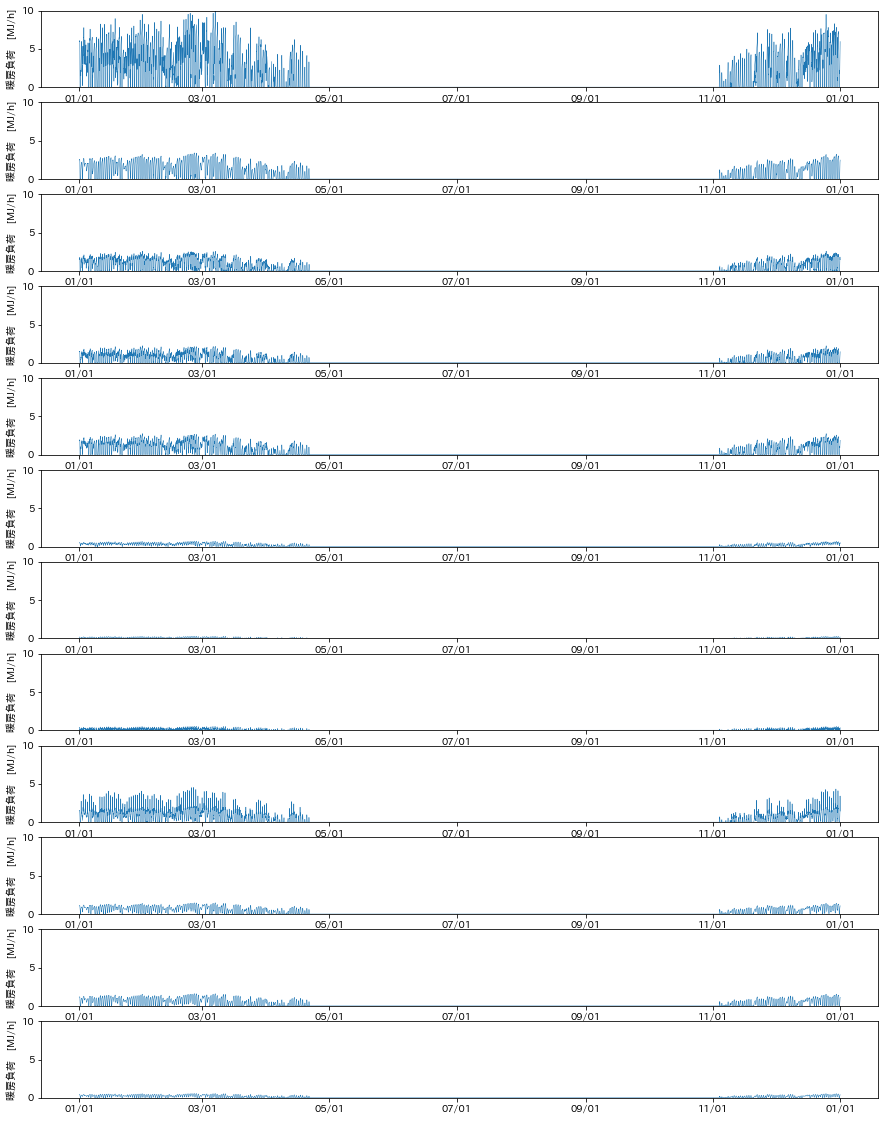

In [ ]:
# ÊöñÊàøË≤†Ëç∑„ÅÆÂèñÂæó
print('„ÄêÊöñÊàøË≤†Ëç∑„ÅÆÂèñÂæó„Äë')
print('\tÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ\t\t\t\t\t\t\t\t\tregion = {}'.format(region))
print('\tÂπ¥Èñì„ÅÆÊó•Â∞ÑÂú∞ÂüüÂå∫ÂàÜ(1-5)\t\t\t\t\t\t\t\t\tsol_region = {}'.format(sol_region))
print('\tÂ∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\t\t\t\t\tA_A = {}'.format(A_A))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\t\t\tA_MR = {}'.format(A_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\t\tA_OR = {}'.format(A_OR))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)\t\t\t\t\t\t\t\tQ = {}'.format(Q))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\t\t\tmu_H = {}'.format(mu_H))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\t\t\tmu_C = {}'.format(mu_C))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞\t\t\t\t\tNV_MR = {}'.format(NV_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞\t\t\t\t\tNV_OR = {}'.format(NV_OR))
print('\tËìÑÁÜ±„ÅÆÂà©Áî®\t\t\t\t\t\t\t\t\t\tTS = {}'.format(TS))
print('\tÂΩìË©≤‰ΩèÊà∏„Å´„Åä„ÅÑ„Å¶„ÄÅÂ∫ä‰∏ãÁ©∫ÈñìÂÖ®‰Ωì„ÅÆÈù¢Á©ç„Å´ÂØæ„Åô„ÇãÁ©∫Ê∞ó„Çí‰æõÁµ¶„Åô„ÇãÂ∫ä‰∏ãÁ©∫Èñì„ÅÆÈù¢Á©ç„ÅÆÊØî (-)\tr_A_ufvnt = {}'.format(r_A_ufvnt))
print('\tÁÜ±‰∫§ÊèõÂô®ÂûãË®≠ÂÇô‰ªïÊßòËæûÊõ∏\t\t\t\t\t\t\t\t\tHEX = {}'.format(HEX))
print('\tÂ∫ä‰∏ãÁ©∫Èñì„ÅåÊñ≠ÁÜ±Á©∫ÈñìÂÜÖ„Åß„ÅÇ„ÇãÂ†¥Âêà„ÅØTrue\t\t\t\t\t\t\tunderfloor_insulation = {}'.format(underfloor_insulation))
print('\tÊöñÊàøÊñπÂºè\t\t\t\t\t\t\t\t\t\tmode_H = {}'.format(mode_H))
print('\tÂÜ∑ÊàøÊñπÂºè\t\t\t\t\t\t\t\t\t\tmode_C = {}'.format(mode_C))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÊöñÊàøÊ©üÂô®„ÅÆ‰ªïÊßò\t\t\t\t\t\t\t\tspec_MR = {}'.format(spec_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÊöñÊàøÊ©üÂô®„ÅÆ‰ªïÊßò\t\t\t\t\t\t\t\tspec_OR = {}'.format(spec_OR))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÈÅãËª¢ÊñπÊ≥ï (ÈÄ£Á∂öÈÅãËª¢|ÈñìÊ≠áÈÅãËª¢)\t\t\t\t\t\tmode_MR = {}'.format(mode_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÈÅãËª¢ÊñπÊ≥ï (ÈÄ£Á∂öÈÅãËª¢|ÈñìÊ≠áÈÅãËª¢)\t\t\t\t\t\tmode_OR = {}'.format(mode_OR))

L_H_d_t_i, _ = calc_heating_load(region, sol_region, A_A, A_MR, A_OR, Q, mu_H, mu_C, NV_MR, NV_OR, TS, r_A_ufvnt,
                                     HEX, underfloor_insulation, mode_H, mode_C, spec_MR, spec_OR, mode_MR, mode_OR, SHC)

plt.rcParams["font.size"] = 10
fig  =plt.figure(facecolor = 'w', figsize = (15, 20))

for ix in range(len(L_H_d_t_i)):
    ax = fig.add_subplot(len(L_H_d_t_i), 1, ix + 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), L_H_d_t_i[ix], linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('ÊöñÊàøË≤†Ëç∑„ÄÄ[MJ/h]')                                                                           
    ax.set_ylim(0, 10)

plt.show()      

# ÂÜ∑ÊàøË≤†Ëç∑„ÅÆÂèñÂæóÔºàMJ/hÔºâ

„ÄêÂÜ∑ÊàøË≤†Ëç∑„ÅÆÂèñÂæó„Äë
	ÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ									region = 6
	Â∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)									A_A = 120.08
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)									A_MR = 29.81
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)								A_OR = 51.34
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)								Q = 2.647962191872085
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))						mu_H = 0.11011767155229846
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))						mu_C = 0.07170453031312457
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞					NV_MR = 0
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞					NV_OR = 0
	ÂΩìË©≤‰ΩèÊà∏„Å´„Åä„ÅÑ„Å¶„ÄÅÂ∫ä‰∏ãÁ©∫ÈñìÂÖ®‰Ωì„ÅÆÈù¢Á©ç„Å´ÂØæ„Åô„ÇãÁ©∫Ê∞ó„Çí‰æõÁµ¶„Åô„ÇãÂ∫ä‰∏ãÁ©∫Èñì„ÅÆÈù¢Á©ç„ÅÆÊØî (-)	r_A_ufvnt = None
	Â∫ä‰∏ãÁ©∫Èñì„ÅåÊñ≠ÁÜ±Á©∫ÈñìÂÜÖ„Åß„ÅÇ„ÇãÂ†¥Âêà„ÅØTrue							underfloor_insulation = False
	ÂÜ∑ÊàøÊñπÂºè										mode_C = ‰ΩèÊà∏ÂÖ®‰Ωì„ÇíÈÄ£Á∂öÁöÑ„Å´ÂÜ∑Êàø„Åô„ÇãÊñπÂºè
	ÊöñÊàøÊñπÂºè							

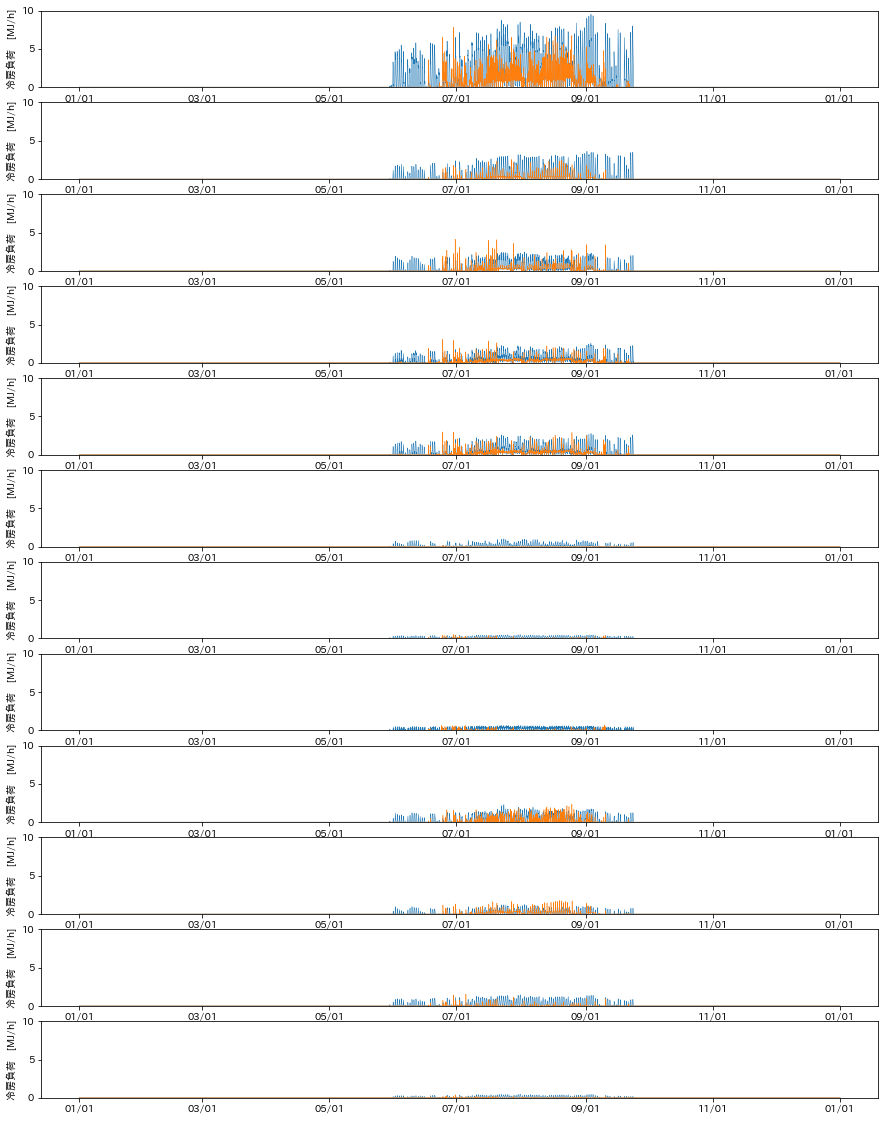

In [ ]:
# ÂÜ∑ÊàøË≤†Ëç∑„ÅÆÂèñÂæó
print('„ÄêÂÜ∑ÊàøË≤†Ëç∑„ÅÆÂèñÂæó„Äë')
print('\tÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ\t\t\t\t\t\t\t\t\tregion = {}'.format(region))
print('\tÂ∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\t\t\t\t\tA_A = {}'.format(A_A))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\t\t\tA_MR = {}'.format(A_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\t\tA_OR = {}'.format(A_OR))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)\t\t\t\t\t\t\t\tQ = {}'.format(Q))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\t\t\tmu_H = {}'.format(mu_H))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\t\t\tmu_C = {}'.format(mu_C))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞\t\t\t\t\tNV_MR = {}'.format(NV_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„Å´„Åä„Åë„ÇãÈÄöÈ¢®„ÅÆÂà©Áî®„Å´„Åä„Åë„ÇãÁõ∏ÂΩìÊèõÊ∞óÂõûÊï∞\t\t\t\t\tNV_OR = {}'.format(NV_OR))
print('\tÂΩìË©≤‰ΩèÊà∏„Å´„Åä„ÅÑ„Å¶„ÄÅÂ∫ä‰∏ãÁ©∫ÈñìÂÖ®‰Ωì„ÅÆÈù¢Á©ç„Å´ÂØæ„Åô„ÇãÁ©∫Ê∞ó„Çí‰æõÁµ¶„Åô„ÇãÂ∫ä‰∏ãÁ©∫Èñì„ÅÆÈù¢Á©ç„ÅÆÊØî (-)\tr_A_ufvnt = {}'.format(r_A_ufvnt))
print('\tÂ∫ä‰∏ãÁ©∫Èñì„ÅåÊñ≠ÁÜ±Á©∫ÈñìÂÜÖ„Åß„ÅÇ„ÇãÂ†¥Âêà„ÅØTrue\t\t\t\t\t\t\tunderfloor_insulation = {}'.format(underfloor_insulation))
print('\tÂÜ∑ÊàøÊñπÂºè\t\t\t\t\t\t\t\t\t\tmode_C = {}'.format(mode_C))
print('\tÊöñÊàøÊñπÂºè\t\t\t\t\t\t\t\t\t\tmode_H = {}'.format(mode_H))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÈÅãËª¢ÊñπÊ≥ï (ÈÄ£Á∂öÈÅãËª¢|ÈñìÊ≠áÈÅãËª¢)\t\t\t\t\t\tmode_MR = {}'.format(mode_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÈÅãËª¢ÊñπÊ≥ï (ÈÄ£Á∂öÈÅãËª¢|ÈñìÊ≠áÈÅãËª¢)\t\t\t\t\t\tmode_OR = {}'.format(mode_OR))
print('\tËìÑÁÜ±„ÅÆÂà©Áî®\t\t\t\t\t\t\t\t\t\tTS = {}'.format(TS))
print('\tÁÜ±‰∫§ÊèõÂô®ÂûãË®≠ÂÇô‰ªïÊßòËæûÊõ∏\t\t\t\t\t\t\t\t\tHEX = {}'.format(HEX))

L_CS_d_t_i, L_CL_d_t_i = calc_cooling_load(region, A_A, A_MR, A_OR, Q, mu_H, mu_C, NV_MR, NV_OR, r_A_ufvnt,
                                               underfloor_insulation, mode_C, mode_H, mode_MR, mode_OR, TS, HEX)

plt.rcParams["font.size"] = 10
fig  =plt.figure(facecolor = 'w', figsize = (15, 20))

for ix in range(len(L_H_d_t_i)):
    ax = fig.add_subplot(len(L_H_d_t_i), 1, ix + 1)                                   
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), L_CS_d_t_i[ix], linewidth = 0.5)
    ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), L_CL_d_t_i[ix], linewidth = 0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_ylabel('ÂÜ∑ÊàøË≤†Ëç∑„ÄÄ[MJ/h]')                                                                           
    ax.set_ylim(0, 10)

plt.show()      

# ÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÔºàkWh/hÔºâ

„ÄêÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆó„Äë
	Â∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)							A_A = 120.08
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)							A_MR = 29.81
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)						A_OR = 51.34
	Â§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©ç„ÅÆÂêàË®à (m2)					A_env = 307.51
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))				mu_H = 0.11011767155229846
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))				mu_C = 0.07170453031312457
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)						Q = 2.647962191872085
	ÊöñÊàøÊñπÂºè								H_A = {'type': '„ÉÄ„ÇØ„ÉàÂºè„Çª„É≥„Éà„É©„É´Á©∫Ë™øÊ©ü', 'duct_insulation': 'ÂÖ®„Å¶„ÇÇ„Åó„Åè„ÅØ‰∏ÄÈÉ®„ÅåÊñ≠ÁÜ±Âå∫ÁîªÂ§ñ„Åß„ÅÇ„Çã', 'VAV': False, 'general_ventilation': True, 'EquipmentSpec': 'ÂÖ•Âäõ„Åó„Å™„ÅÑ'}
	ÊöñÊàøË≤†Ëç∑								L_H_d_t_i
	ÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑								L_CS_d_t_i
	ÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑								L_CL_d_t_i
	ÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ							region = 6
	ÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõ (W)							q_rtd_C = 5600
	ÂÆöÊ†ºÊöñÊàøËÉΩÂäõ (W)							q_rtd_H = 6685.3
	ÊúÄÂ§ßÂÜ∑ÊàøËÉΩÂäõ (W)		

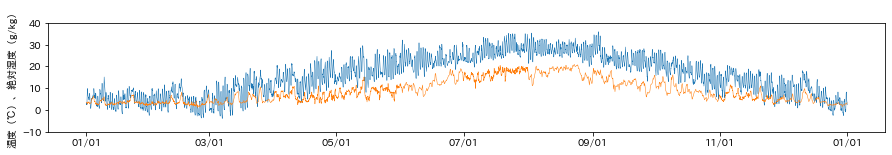

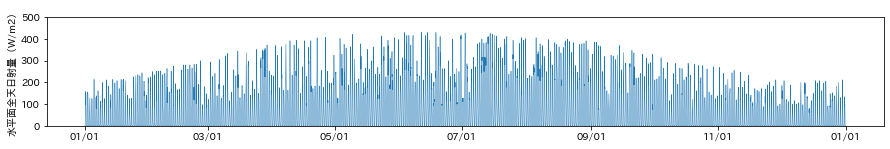

„Äêcalc_CRAC_E_E_H_d_t„Äë


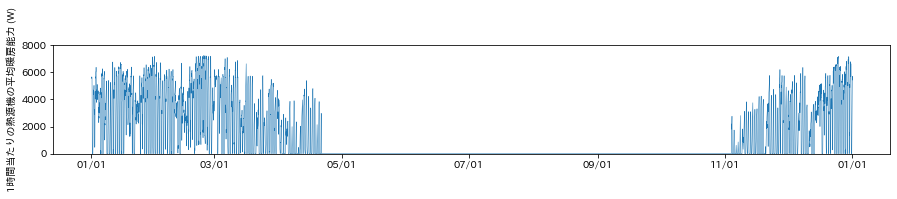

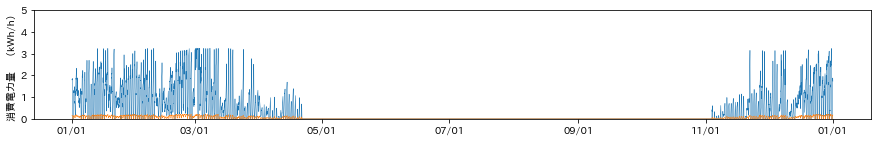

„ÄêÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÁµêÊûú„Äë


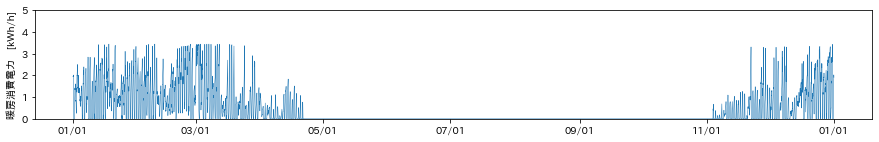

„ÄêÊöñÊàøÊú™Âá¶ÁêÜË≤†Ëç∑„ÅÆË®àÁÆóÁµêÊûú„Äë


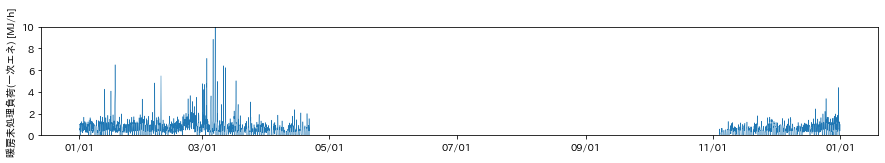

In [ ]:
print('„ÄêÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆó„Äë')
print('\tÂ∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\t\t\tA_A = {}'.format(A_A))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\tA_MR = {}'.format(A_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\tA_OR = {}'.format(A_OR))
print('\tÂ§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\tA_env = {}'.format(ENV['A_env']))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\tmu_H = {}'.format(mu_H))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\tmu_C = {}'.format(mu_C))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)\t\t\t\t\t\tQ = {}'.format(Q))
print('\tÊöñÊàøÊñπÂºè\t\t\t\t\t\t\t\tH_A = {}'.format(H_A))
print('\tÊöñÊàøË≤†Ëç∑\t\t\t\t\t\t\t\tL_H_d_t_i')
print('\tÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑\t\t\t\t\t\t\t\tL_CS_d_t_i')
print('\tÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑\t\t\t\t\t\t\t\tL_CL_d_t_i')
print('\tÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ\t\t\t\t\t\t\tregion = {}'.format(region))
print('\tÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_rtd_C = {}'.format(q_rtd_C))
print('\tÂÆöÊ†ºÊöñÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_rtd_H = {}'.format(q_rtd_H))
print('\tÊúÄÂ§ßÂÜ∑ÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_max_C = {}'.format(q_max_C))
print('\tÊúÄÂ§ßÊöñÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_max_H = {}'.format(q_max_H))
print('\tÂÆöÊ†ºÊöñÊàø„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÂäπÁéá\t\t\t\t\t\tq_max_H = {}'.format(e_rtd_H))

V_fan_rtd_H = dc_spec.get_V_fan_rtd_H(q_rtd_H)
V_hs_dsgn_H = dc_spec.get_V_fan_dsgn_H(V_fan_rtd_H)
P_fan_rtd_H = dc_spec.get_P_fan_rtd_H(V_fan_rtd_H)

V_hs_dsgn_C = 0

print('\tÂÆöÊ†ºÊöñÊàøËÉΩÂäõÈÅãËª¢ÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆÈ¢®Èáè(m3/h)\t\t\t\t\tV_fan_rtd_H = {}'.format(V_fan_rtd_H))
print('\tÊöñÊàøÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆË®≠Ë®àÈ¢®Èáè(m3/h)\t\t\t\t\t\tV_hs_dsgn_H = {}'.format(V_hs_dsgn_H))
print('\tÂÆöÊ†ºÊöñÊàøËÉΩÂäõÈÅãËª¢ÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆÊ∂àË≤ªÈõªÂäõ(W)\t\t\t\t\tP_fan_rtd_H = {}'.format(P_fan_rtd_H))

_, Q_UT_H_d_t_i, _, _, Theta_hs_out_d_t, Theta_hs_in_d_t, _, _, V_hs_supply_d_t, V_hs_vent_d_t, C_df_H_d_t\
 = calc_CRAC_Q_UT_A(A_A, A_MR, A_OR, ENV['A_env'], mu_H, mu_C,
                    q_rtd_C, q_rtd_H, q_max_C, q_max_H, V_hs_dsgn_H, V_hs_dsgn_C, Q, H_A['VAV'], H_A['general_ventilation'],
                    H_A['duct_insulation'], region, L_H_d_t_i, L_CS_d_t_i, L_CL_d_t_i)

E_E_H_d_t = calc_CRAC_E_E_H_d_t(Theta_hs_out_d_t = Theta_hs_out_d_t,
                                Theta_hs_in_d_t = Theta_hs_in_d_t,
                                V_hs_supply_d_t = V_hs_supply_d_t,
                                V_hs_vent_d_t = V_hs_vent_d_t,
                                C_df_H_d_t = C_df_H_d_t,
                                V_hs_dsgn_H = V_hs_dsgn_H,
                                P_fan_rtd_H = P_fan_rtd_H,
                                region = region,
                                q_rtd_C = q_rtd_C,
                                q_rtd_H = q_rtd_H,
                                e_rtd_H = e_rtd_H)

alpha_UT_H_A = get_alpha_UT_H_A(region)
Q_UT_H_A_d_t = np.sum(Q_UT_H_d_t_i, axis=0)
E_UT_H_d_t = Q_UT_H_A_d_t * alpha_UT_H_A

print('„ÄêÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÁµêÊûú„Äë')
fig=plt.figure(facecolor = 'w', figsize = (15, 2))
ax = fig.add_subplot(1, 1, 1)                                   
ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_H_d_t, linewidth = 0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_ylabel('ÊöñÊàøÊ∂àË≤ªÈõªÂäõ„ÄÄ[kWh/h]')                                                                           
ax.set_ylim(0, 5)
plt.show() 

print('„ÄêÊöñÊàøÊú™Âá¶ÁêÜË≤†Ëç∑„ÅÆË®àÁÆóÁµêÊûú„Äë')
fig=plt.figure(facecolor = 'w',figsize = (15, 2))
ax = fig.add_subplot(1, 1, 1)                                   
ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_UT_H_d_t, linewidth = 0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_ylabel('ÊöñÊàøÊú™Âá¶ÁêÜË≤†Ëç∑(‰∏ÄÊ¨°„Ç®„Éç) [MJ/h]')                                                                           
ax.set_ylim(0, 10)
plt.show() 

# ÂÜ∑ÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÔºàkWh/hÔºâ

	ÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ							region = 6
	Â∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)							A_A = 120.08
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)							A_MR = 29.81
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)						A_OR = 51.34
	A_env: Â§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©ç„ÅÆÂêàË®à (m2)					A_env = 307.51
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))				mu_H = 0.11011767155229846
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))				mu_C = 0.07170453031312457
	ÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)						Q = 2.647962191872085
	ÂÜ∑ÊàøÊñπÂºè								C_A = {'type': '„ÉÄ„ÇØ„ÉàÂºè„Çª„É≥„Éà„É©„É´Á©∫Ë™øÊ©ü', 'duct_insulation': 'ÂÖ®„Å¶„ÇÇ„Åó„Åè„ÅØ‰∏ÄÈÉ®„ÅåÊñ≠ÁÜ±Âå∫ÁîªÂ§ñ„Åß„ÅÇ„Çã', 'VAV': False, 'general_ventilation': True, 'EquipmentSpec': 'ÂÖ•Âäõ„Åó„Å™„ÅÑ'}
	‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂÜ∑ÊàøÊ©üÂô®							C_MR = None
	„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂÜ∑ÊàøÊ©üÂô®							C_OR = None
	ÊöñÊàøË≤†Ëç∑								L_H_d_t_i
	ÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑								L_CS_d_t_i
	ÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑								L_CL_d_t_i
	ÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõ (W)							q_rtd_C = 5

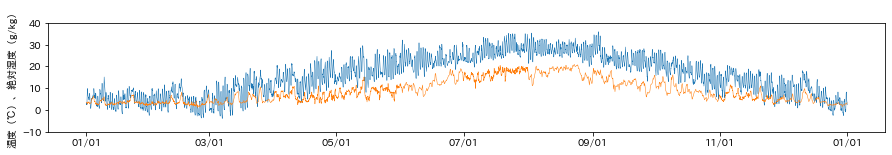

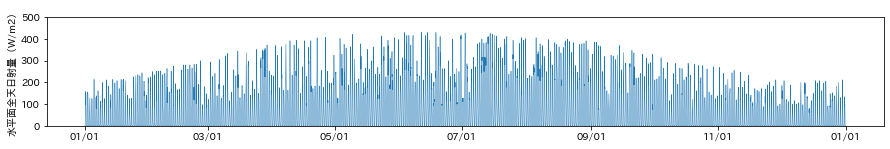

„Äêget_CRAC_E_E_C_d_t„Äë


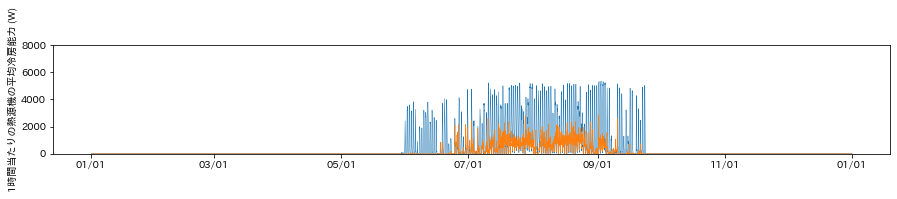

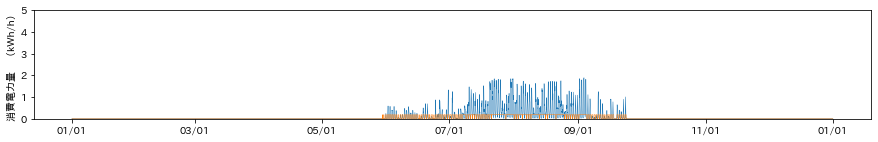

„ÄêÂÜ∑ÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÁµêÊûú„Äë


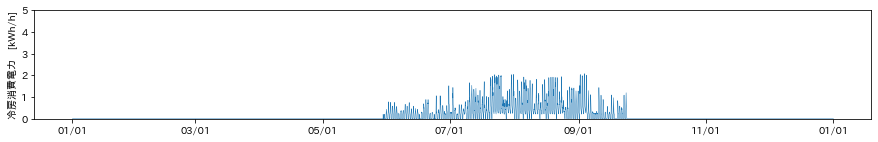

„ÄêÂÜ∑ÊàøÊú™Âá¶ÁêÜË≤†Ëç∑„ÅÆË®àÁÆóÁµêÊûú„Äë


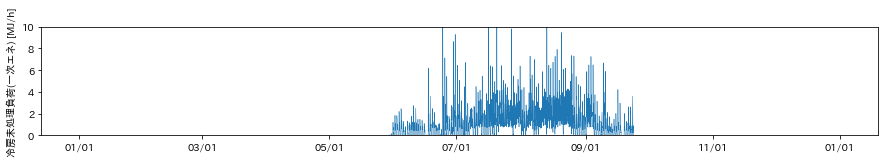

In [ ]:
print('\tÁúÅ„Ç®„Éç„É´„ÇÆ„ÉºÂú∞ÂüüÂå∫ÂàÜ\t\t\t\t\t\t\tregion = {}'.format(region))
print('\tÂ∫äÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\t\t\tA_A = {}'.format(A_A))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\t\tA_MR = {}'.format(A_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂ∫äÈù¢Á©ç (m2)\t\t\t\t\t\tA_OR = {}'.format(A_OR))
print('\tA_env: Â§ñÁöÆ„ÅÆÈÉ®‰Ωç„ÅÆÈù¢Á©ç„ÅÆÂêàË®à (m2)\t\t\t\t\tA_env = {}'.format(ENV['A_env']))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÊöñÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\tmu_H = {}'.format(mu_H))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÂÜ∑ÊàøÊúü„ÅÆÊó•Â∞ÑÂèñÂæó‰øÇÊï∞ ((W/m2)/(W/m2))\t\t\t\tmu_C = {}'.format(mu_C))
print('\tÂΩìË©≤‰ΩèÊà∏„ÅÆÁÜ±ÊêçÂ§±‰øÇÊï∞ (W/m2K)\t\t\t\t\t\tQ = {}'.format(Q))
print('\tÂÜ∑ÊàøÊñπÂºè\t\t\t\t\t\t\t\tC_A = {}'.format(C_A))
print('\t‰∏ª„Åü„ÇãÂ±ÖÂÆ§„ÅÆÂÜ∑ÊàøÊ©üÂô®\t\t\t\t\t\t\tC_MR = {}'.format(C_MR))
print('\t„Åù„ÅÆ‰ªñ„ÅÆÂ±ÖÂÆ§„ÅÆÂÜ∑ÊàøÊ©üÂô®\t\t\t\t\t\t\tC_OR = {}'.format(C_OR))
print('\tÊöñÊàøË≤†Ëç∑\t\t\t\t\t\t\t\tL_H_d_t_i')
print('\tÂÜ∑ÊàøÈ°ïÁÜ±Ë≤†Ëç∑\t\t\t\t\t\t\t\tL_CS_d_t_i')
print('\tÂÜ∑ÊàøÊΩúÁÜ±Ë≤†Ëç∑\t\t\t\t\t\t\t\tL_CL_d_t_i')
print('\tÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_rtd_C = {}'.format(q_rtd_C))
print('\tÂÆöÊ†ºÊöñÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_rtd_H = {}'.format(q_rtd_H))
print('\tÊúÄÂ§ßÂÜ∑ÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_max_C = {}'.format(q_max_C))
print('\tÊúÄÂ§ßÊöñÊàøËÉΩÂäõ (W)\t\t\t\t\t\t\tq_max_H = {}'.format(q_max_H))
print('\tÂÆöÊ†ºÊöñÊàø„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÂäπÁéá\t\t\t\t\t\tq_max_H = {}'.format(e_rtd_H))

V_fan_rtd_C = dc_spec.get_V_fan_rtd_C(q_rtd_C)
V_hs_dsgn_C = dc_spec.get_V_fan_dsgn_C(V_fan_rtd_C)
P_fan_rtd_C = dc_spec.get_P_fan_rtd_C(V_fan_rtd_C)

V_hs_dsgn_H = 0

print('\tÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõÈÅãËª¢ÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆÈ¢®Èáè(m3/h)\t\t\t\t\tV_fan_rtd_C = {}'.format(V_fan_rtd_C))
print('\tÂÜ∑ÊàøÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆË®≠Ë®àÈ¢®Èáè(m3/h)\t\t\t\t\t\tV_hs_dsgn_C = {}'.format(V_hs_dsgn_C))
print('\tÂÆöÊ†ºÂÜ∑ÊàøËÉΩÂäõÈÅãËª¢ÊôÇ„ÅÆÈÄÅÈ¢®Ê©ü„ÅÆÊ∂àË≤ªÈõªÂäõ(W)\t\t\t\t\tP_fan_rtd_C = {}'.format(P_fan_rtd_C))

E_UT_C_d_t, _, _, _, Theta_hs_out_d_t, Theta_hs_in_d_t, X_hs_out_d_t, X_hs_in_d_t, V_hs_supply_d_t, V_hs_vent_d_t, _\
= calc_CRAC_Q_UT_A(A_A, A_MR, A_OR, ENV['A_env'], mu_H, mu_C, 
                   q_rtd_C, q_rtd_H, q_max_C, q_max_H, V_hs_dsgn_H, V_hs_dsgn_C, Q, C_A['VAV'], C_A['general_ventilation'],
                   C_A['duct_insulation'], region, L_H_d_t_i, L_CS_d_t_i, L_CL_d_t_i)

E_E_C_d_t = get_CRAC_E_E_C_d_t(Theta_hs_out_d_t = Theta_hs_out_d_t,
                                 Theta_hs_in_d_t = Theta_hs_in_d_t,
                                 X_hs_out_d_t = X_hs_out_d_t,
                                 X_hs_in_d_t = X_hs_in_d_t,
                                 V_hs_supply_d_t = V_hs_supply_d_t,
                                 V_hs_vent_d_t = V_hs_vent_d_t,
                                 q_rtd_C = q_rtd_C,
                                 e_rtd_C = e_rtd_C,
                                 V_hs_dsgn_C = V_hs_dsgn_C,
                                 P_fan_rtd_C = P_fan_rtd_C,
                                 region = region)

print('„ÄêÂÜ∑ÊàøÊ∂àË≤ªÈõªÂäõ„ÅÆË®àÁÆóÁµêÊûú„Äë')
fig=plt.figure(facecolor = 'w',figsize = (15, 2))
ax = fig.add_subplot(1, 1, 1)                                   
ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_E_C_d_t, linewidth = 0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_ylabel('ÂÜ∑ÊàøÊ∂àË≤ªÈõªÂäõ„ÄÄ[kWh/h]')                                                                           
ax.set_ylim(0, 5)
plt.show() 

print('„ÄêÂÜ∑ÊàøÊú™Âá¶ÁêÜË≤†Ëç∑„ÅÆË®àÁÆóÁµêÊûú„Äë')
fig=plt.figure(facecolor = 'w',figsize = (15, 2))
ax = fig.add_subplot(1, 1, 1)                                   
ax.plot(pd.date_range('2019-01-01 01:00:00', '2020-01-01 00:00:00', freq='h'), E_UT_C_d_t, linewidth = 0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_ylabel('ÂÜ∑ÊàøÊú™Âá¶ÁêÜË≤†Ëç∑(‰∏ÄÊ¨°„Ç®„Éç) [MJ/h]')                                                                           
ax.set_ylim(0, 10)
plt.show() 

# Ë®àÁÆóÁµêÊûú„ÅÆ„Åæ„Å®„ÇÅ

In [ ]:
# ÈõªÊ∞ó„ÅÆÈáè 1kWh „ÇíÁÜ±Èáè„Å´ÊèõÁÆó„Åô„Çã‰øÇÊï∞
f_prim = get_f_prim()

# 1 ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÊöñÊàøË®≠ÂÇô„ÅÆË®≠Ë®à‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèÔºàMJ/hÔºâ
E_H_d_t = E_E_H_d_t * f_prim / 1000 + E_UT_H_d_t

# 1 ÊôÇÈñìÂΩì„Åü„Çä„ÅÆÂÜ∑ÊàøË®≠ÂÇô„ÅÆË®≠Ë®à‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèÔºàMJ/hÔºâ
E_C_d_t = E_E_C_d_t * f_prim / 1000 + E_UT_C_d_t

# 1 Âπ¥ÂΩì„Åü„Çä„ÅÆÊöñÊàøË®≠ÂÇô„ÅÆË®≠Ë®à‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèÔºàMJ/Âπ¥Ôºâ
E_H = np.sum(E_H_d_t)

# 1 Âπ¥ÂΩì„Åü„Çä„ÅÆÂÜ∑ÊàøË®≠ÂÇô„ÅÆË®≠Ë®à‰∏ÄÊ¨°„Ç®„Éç„É´„ÇÆ„ÉºÊ∂àË≤ªÈáèÔºàMJ/Âπ¥Ôºâ
E_C = np.sum(E_C_d_t)

print({'E_H': E_H, 'E_C': E_C})

{'E_H': 37818.830329780074, 'E_C': 14596.270280805114}


{'E_H': 38986.65275929407, 'E_C': 14596.270280805114}

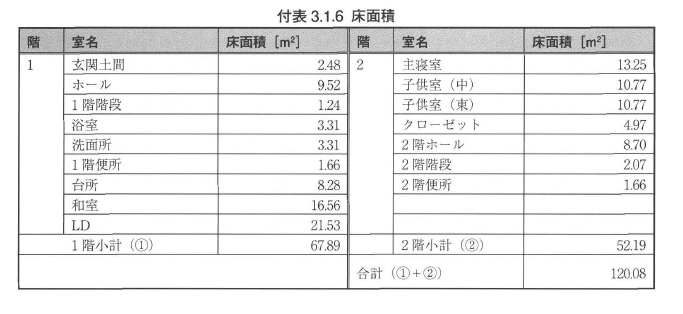